In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier
import joblib
from sklearn.preprocessing  import RobustScaler
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [61]:
df = pd.read_csv("weatherAUS.csv")
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [62]:
total_count = df["RainTomorrow"]

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

# Preprocessing the data 

In [64]:
# categorise features based on their characteristics
numerical_feature = [feature for feature in df.columns if df[feature].dtypes != 'O']
discrete_feature=[feature for feature in numerical_feature if len(df[feature].unique())<25]
continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature]
categorical_feature = [feature for feature in df.columns if feature not in numerical_feature]

print("Numerical Features Count {}".format(len(numerical_feature)))
print("Discrete feature Count {}".format(len(discrete_feature)))
print("Continuous feature Count {}".format(len(continuous_feature)))
print("Categorical feature Count {}".format(len(categorical_feature)))

Numerical Features Count 16
Discrete feature Count 2
Continuous feature Count 14
Categorical feature Count 7


#### checking for Missing Values and handling them 

In [65]:
df.isnull().sum()*100/len(df)

Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64

In [66]:
print(numerical_feature)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [67]:
# random sample imputation technique
def randomsampleimputation(df, variable):
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable]=random_sample
    
    
randomsampleimputation(df, "Cloud9am")
randomsampleimputation(df, "Cloud3pm")
randomsampleimputation(df, "Evaporation")
randomsampleimputation(df, "Sunshine")

In [68]:
df.isnull().sum()*100/len(df)

Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation       0.000000
Sunshine          0.000000
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am          0.000000
Cloud3pm          0.000000
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64

In [69]:
# median imputation 
for feature in continuous_feature:
    if(df[feature].isnull().sum()*100/len(df))>0:
        df[feature] = df[feature].fillna(df[feature].mean())

In [70]:
df.isnull().sum()*100/len(df)

Date             0.000000
Location         0.000000
MinTemp          0.000000
MaxTemp          0.000000
Rainfall         0.000000
Evaporation      0.000000
Sunshine         0.000000
WindGustDir      7.098859
WindGustSpeed    0.000000
WindDir9am       7.263853
WindDir3pm       2.906641
WindSpeed9am     0.000000
WindSpeed3pm     0.000000
Humidity9am      0.000000
Humidity3pm      0.000000
Pressure9am      0.000000
Pressure3pm      0.000000
Cloud9am         0.000000
Cloud3pm         0.000000
Temp9am          0.000000
Temp3pm          0.000000
RainToday        2.241853
RainTomorrow     2.245978
dtype: float64

In [71]:
discrete_feature

['Cloud9am', 'Cloud3pm']

In [72]:
# mode imputation for discrete features
def mode_nan(df,variable):
    mode=df[variable].value_counts().index[0]
    df[variable].fillna(mode,inplace=True)
mode_nan(df,"Cloud9am")
mode_nan(df,"Cloud3pm")

In [73]:
df.isna().sum()

Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation          0
Sunshine             0
WindGustDir      10326
WindGustSpeed        0
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am          0
Pressure3pm          0
Cloud9am             0
Cloud3pm             0
Temp9am              0
Temp3pm              0
RainToday         3261
RainTomorrow      3267
dtype: int64

In [74]:
df["RainToday"].value_counts()

No     110319
Yes     31880
Name: RainToday, dtype: int64

In [75]:
df["RainToday"] = pd.get_dummies(df["RainToday"],drop_first=True )
df["RainTomorrow"] = pd.get_dummies(df["RainTomorrow"], drop_first = True)
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.900000,0.6,2.4,8.3,W,44.00000,W,...,71.0,22.0,1007.7,1007.1,8.0,0.0,16.9,21.8,0,0
1,2008-12-02,Albury,7.4,25.100000,0.0,3.6,10.0,WNW,44.00000,NNW,...,44.0,25.0,1010.6,1007.8,7.0,1.0,17.2,24.3,0,0
2,2008-12-03,Albury,12.9,25.700000,0.0,2.6,4.4,WSW,46.00000,W,...,38.0,30.0,1007.6,1008.7,8.0,2.0,21.0,23.2,0,0
3,2008-12-04,Albury,9.2,28.000000,0.0,18.4,8.9,NE,24.00000,SE,...,45.0,16.0,1017.6,1012.8,0.0,5.0,18.1,26.5,0,0
4,2008-12-05,Albury,17.5,32.300000,1.0,5.4,3.0,W,41.00000,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.400000,0.0,1.4,7.8,E,31.00000,SE,...,51.0,24.0,1024.6,1020.3,1.0,1.0,10.1,22.4,0,0
145456,2017-06-22,Uluru,3.6,25.300000,0.0,7.6,13.5,NNW,22.00000,SE,...,56.0,21.0,1023.5,1019.1,8.0,5.0,10.9,24.5,0,0
145457,2017-06-23,Uluru,5.4,26.900000,0.0,6.8,11.0,N,37.00000,SE,...,53.0,24.0,1021.0,1016.8,8.0,1.0,12.5,26.1,0,0
145458,2017-06-24,Uluru,7.8,27.000000,0.0,2.6,13.2,SE,28.00000,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,0,0


In [76]:
for feature in categorical_feature:
    print(feature, (df.groupby([feature])["RainTomorrow"].mean().sort_values(ascending = False)).index)

Date Index(['2007-11-01', '2007-12-15', '2008-02-03', '2008-01-31', '2008-01-30',
       '2008-01-19', '2008-01-18', '2008-01-16', '2008-01-12', '2007-11-30',
       ...
       '2008-05-08', '2008-05-09', '2008-01-03', '2008-01-02', '2008-05-10',
       '2008-05-11', '2008-05-12', '2008-05-13', '2008-05-14', '2007-12-25'],
      dtype='object', name='Date', length=3436)
Location Index(['Portland', 'Walpole', 'Cairns', 'Dartmoor', 'NorfolkIsland',
       'MountGambier', 'Albany', 'Witchcliffe', 'CoffsHarbour', 'MountGinini',
       'NorahHead', 'Darwin', 'Sydney', 'SydneyAirport', 'Ballarat',
       'GoldCoast', 'Watsonia', 'Newcastle', 'Hobart', 'Wollongong',
       'Williamtown', 'Launceston', 'Brisbane', 'MelbourneAirport', 'Adelaide',
       'Sale', 'Albury', 'Perth', 'Melbourne', 'Nuriootpa', 'Penrith',
       'BadgerysCreek', 'PerthAirport', 'Tuggeranong', 'Richmond', 'Bendigo',
       'Canberra', 'WaggaWagga', 'Townsville', 'Katherine', 'PearceRAAF',
       'SalmonGums', 'Nhil', 

In [77]:
# Applying label encoding
windgustdir = {'NNW':0, 'NW':1, 'WNW':2, 'N':3, 'W':4, 'WSW':5, 'NNE':6, 'S':7, 'SSW':8, 'SW':9, 'SSE':10,
       'NE':11, 'SE':12, 'ESE':13, 'ENE':14, 'E':15}
winddir9am = {'NNW':0, 'N':1, 'NW':2, 'NNE':3, 'WNW':4, 'W':5, 'WSW':6, 'SW':7, 'SSW':8, 'NE':9, 'S':10,
       'SSE':11, 'ENE':12, 'SE':13, 'ESE':14, 'E':15}
winddir3pm = {'NW':0, 'NNW':1, 'N':2, 'WNW':3, 'W':4, 'NNE':5, 'WSW':6, 'SSW':7, 'S':8, 'SW':9, 'SE':10,
       'NE':11, 'SSE':12, 'ENE':13, 'E':14, 'ESE':15}

df["WindGustDir"] = df["WindGustDir"].map(windgustdir)
df["WindDir9am"] = df["WindDir9am"].map(winddir9am)
df["WindDir3pm"] = df["WindDir3pm"].map(winddir3pm)

In [78]:
# applying mode imputation on wind direction (categorical) columns
df["WindGustDir"] = df["WindGustDir"].fillna(df["WindGustDir"].value_counts().index[0])
df["WindDir9am"] = df["WindDir9am"].fillna(df["WindDir9am"].value_counts().index[0])
df["WindDir3pm"] = df["WindDir3pm"].fillna(df["WindDir3pm"].value_counts().index[0])

In [79]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

### applying frequency encoding for the Location variable 

In [80]:
df1 = df.groupby(["Location"])["RainTomorrow"].value_counts().sort_values().unstack()
df1

RainTomorrow,0,1
Location,,
Adelaide,2505,688
Albany,2138,902
Albury,2422,618
AliceSprings,2796,244
BadgerysCreek,2426,583
Ballarat,2259,781
Bendigo,2478,562
Brisbane,2484,709
Cairns,2090,950


In [81]:
df1[1].sort_values(ascending = False).index

Index(['Portland', 'Cairns', 'Walpole', 'Dartmoor', 'MountGambier',
       'NorfolkIsland', 'Albany', 'Witchcliffe', 'CoffsHarbour', 'Sydney',
       'Darwin', 'MountGinini', 'NorahHead', 'Ballarat', 'GoldCoast',
       'SydneyAirport', 'Hobart', 'Watsonia', 'Newcastle', 'Wollongong',
       'Brisbane', 'Williamtown', 'Launceston', 'Adelaide', 'MelbourneAirport',
       'Perth', 'Sale', 'Melbourne', 'Canberra', 'Albury', 'Penrith',
       'Nuriootpa', 'BadgerysCreek', 'Tuggeranong', 'PerthAirport', 'Bendigo',
       'Richmond', 'WaggaWagga', 'Townsville', 'PearceRAAF', 'SalmonGums',
       'Moree', 'Cobar', 'Mildura', 'Katherine', 'AliceSprings', 'Nhil',
       'Woomera', 'Uluru'],
      dtype='object', name='Location')

In [82]:
len(df1[1].sort_values(ascending = False).index)

49

In [83]:
# applying label encoding
location = {'Portland':1, 'Cairns':2, 'Walpole':3, 'Dartmoor':4, 'MountGambier':5,
       'NorfolkIsland':6, 'Albany':7, 'Witchcliffe':8, 'CoffsHarbour':9, 'Sydney':10,
       'Darwin':11, 'MountGinini':12, 'NorahHead':13, 'Ballarat':14, 'GoldCoast':15,
       'SydneyAirport':16, 'Hobart':17, 'Watsonia':18, 'Newcastle':19, 'Wollongong':20,
       'Brisbane':21, 'Williamtown':22, 'Launceston':23, 'Adelaide':24, 'MelbourneAirport':25,
       'Perth':26, 'Sale':27, 'Melbourne':28, 'Canberra':29, 'Albury':30, 'Penrith':31,
       'Nuriootpa':32, 'BadgerysCreek':33, 'Tuggeranong':34, 'PerthAirport':35, 'Bendigo':36,
       'Richmond':37, 'WaggaWagga':38, 'Townsville':39, 'PearceRAAF':40, 'SalmonGums':41,
       'Moree':42, 'Cobar':43, 'Mildura':44, 'Katherine':45, 'AliceSprings':46, 'Nhil':47,
       'Woomera':48, 'Uluru':49}
df["Location"] = df["Location"].map(location)

In [84]:
df["Date"] = pd.to_datetime(df["Date"], format = "%Y-%m-%dT", errors = "coerce")   # change date format

In [85]:
# we are  creating 2 new columns for the month and the date
df["Date_month"] = df["Date"].dt.month
df["Date_day"] = df["Date"].dt.day

In [86]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Date_month,Date_day
0,2008-12-01,30,13.4,22.900000,0.6,2.4,8.3,4.0,44.00000,5.0,...,1007.7,1007.1,8.0,0.0,16.9,21.8,0,0,12,1
1,2008-12-02,30,7.4,25.100000,0.0,3.6,10.0,2.0,44.00000,0.0,...,1010.6,1007.8,7.0,1.0,17.2,24.3,0,0,12,2
2,2008-12-03,30,12.9,25.700000,0.0,2.6,4.4,5.0,46.00000,5.0,...,1007.6,1008.7,8.0,2.0,21.0,23.2,0,0,12,3
3,2008-12-04,30,9.2,28.000000,0.0,18.4,8.9,11.0,24.00000,13.0,...,1017.6,1012.8,0.0,5.0,18.1,26.5,0,0,12,4
4,2008-12-05,30,17.5,32.300000,1.0,5.4,3.0,4.0,41.00000,12.0,...,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,49,2.8,23.400000,0.0,1.4,7.8,15.0,31.00000,13.0,...,1024.6,1020.3,1.0,1.0,10.1,22.4,0,0,6,21
145456,2017-06-22,49,3.6,25.300000,0.0,7.6,13.5,0.0,22.00000,13.0,...,1023.5,1019.1,8.0,5.0,10.9,24.5,0,0,6,22
145457,2017-06-23,49,5.4,26.900000,0.0,6.8,11.0,3.0,37.00000,13.0,...,1021.0,1016.8,8.0,1.0,12.5,26.1,0,0,6,23
145458,2017-06-24,49,7.8,27.000000,0.0,2.6,13.2,12.0,28.00000,11.0,...,1019.4,1016.5,3.0,2.0,15.1,26.0,0,0,6,24


### Checking for outliers and handling them 

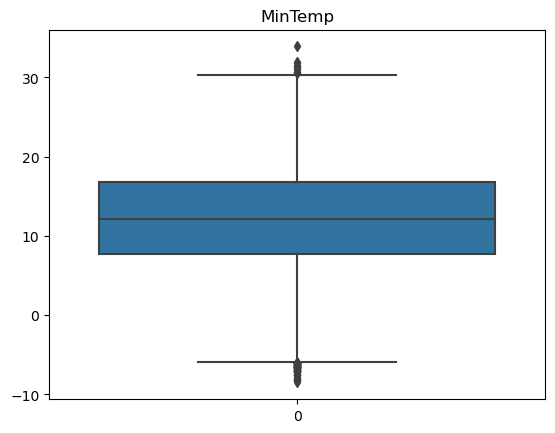

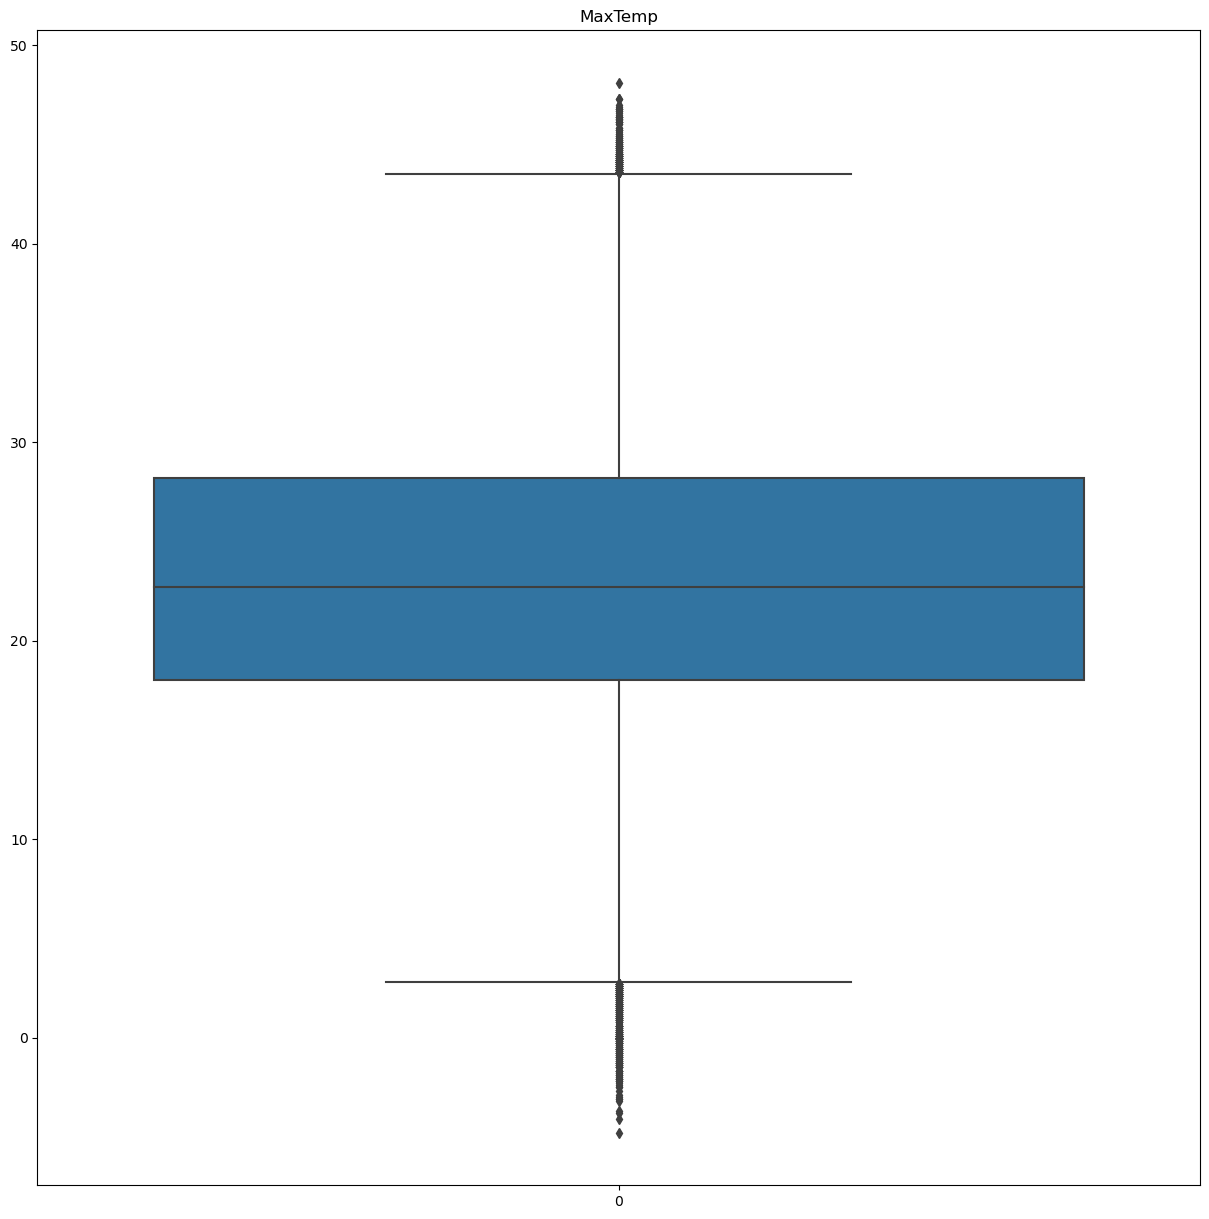

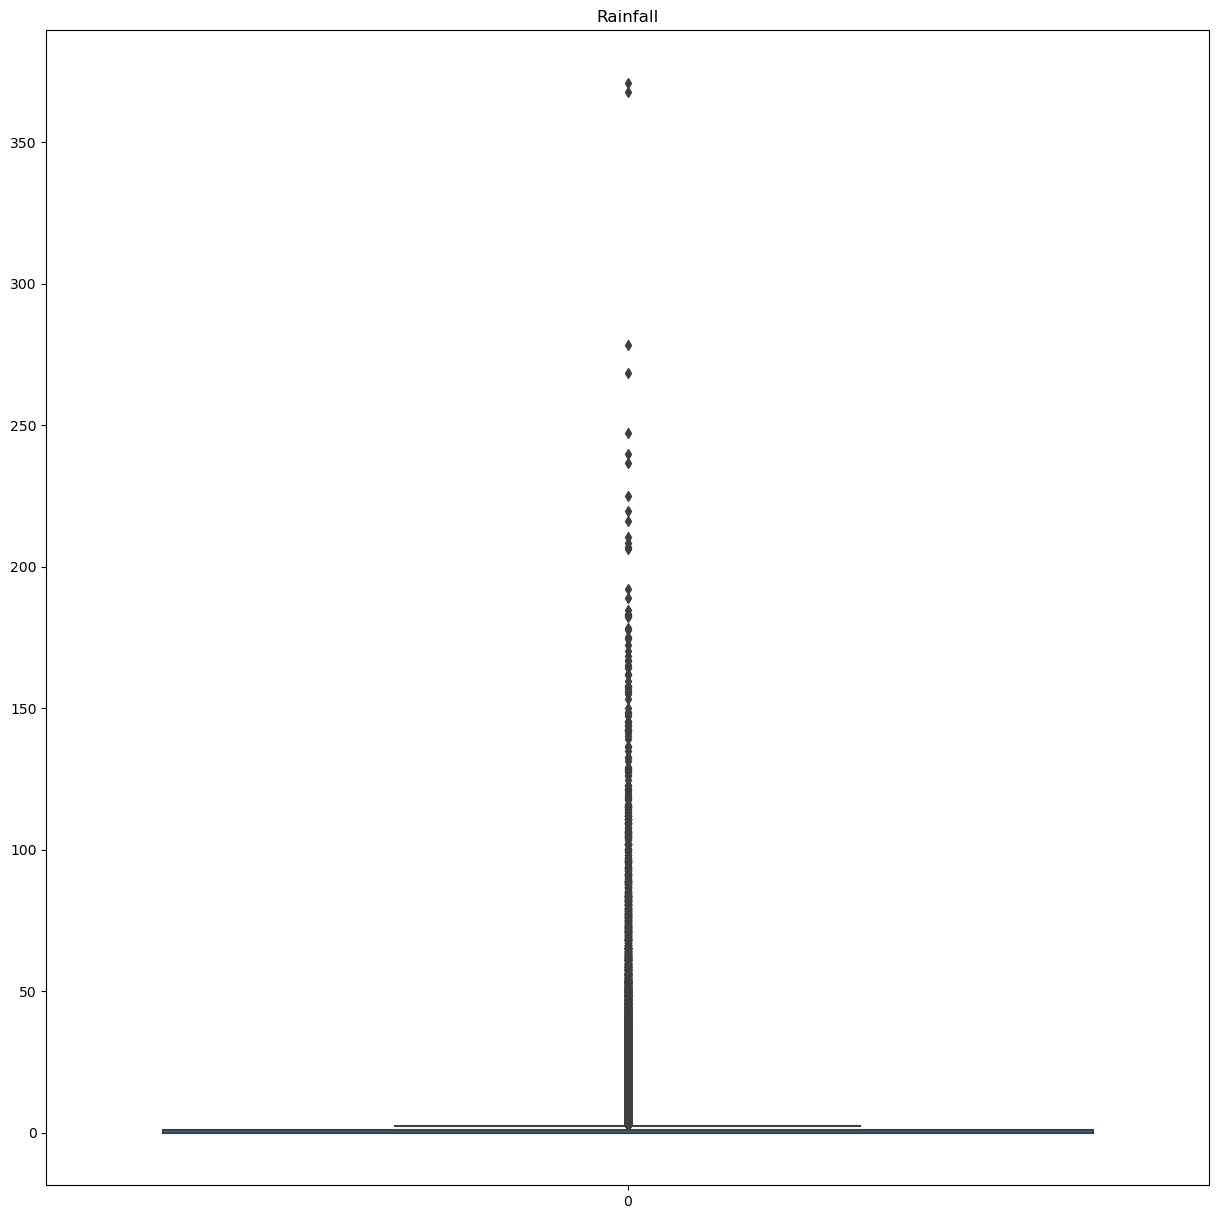

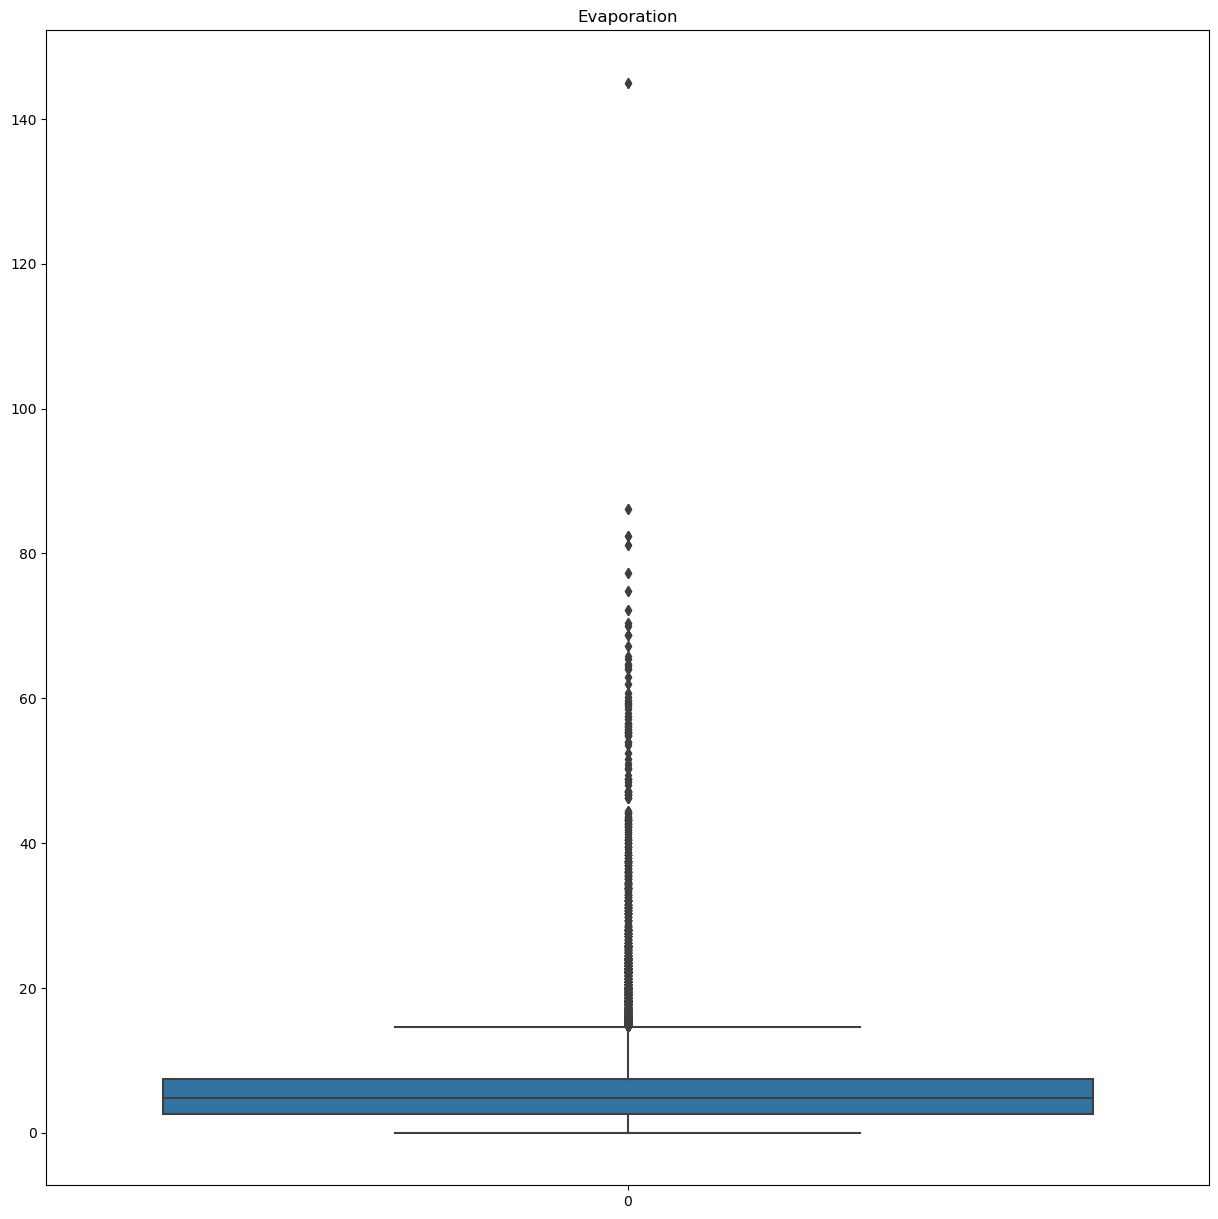

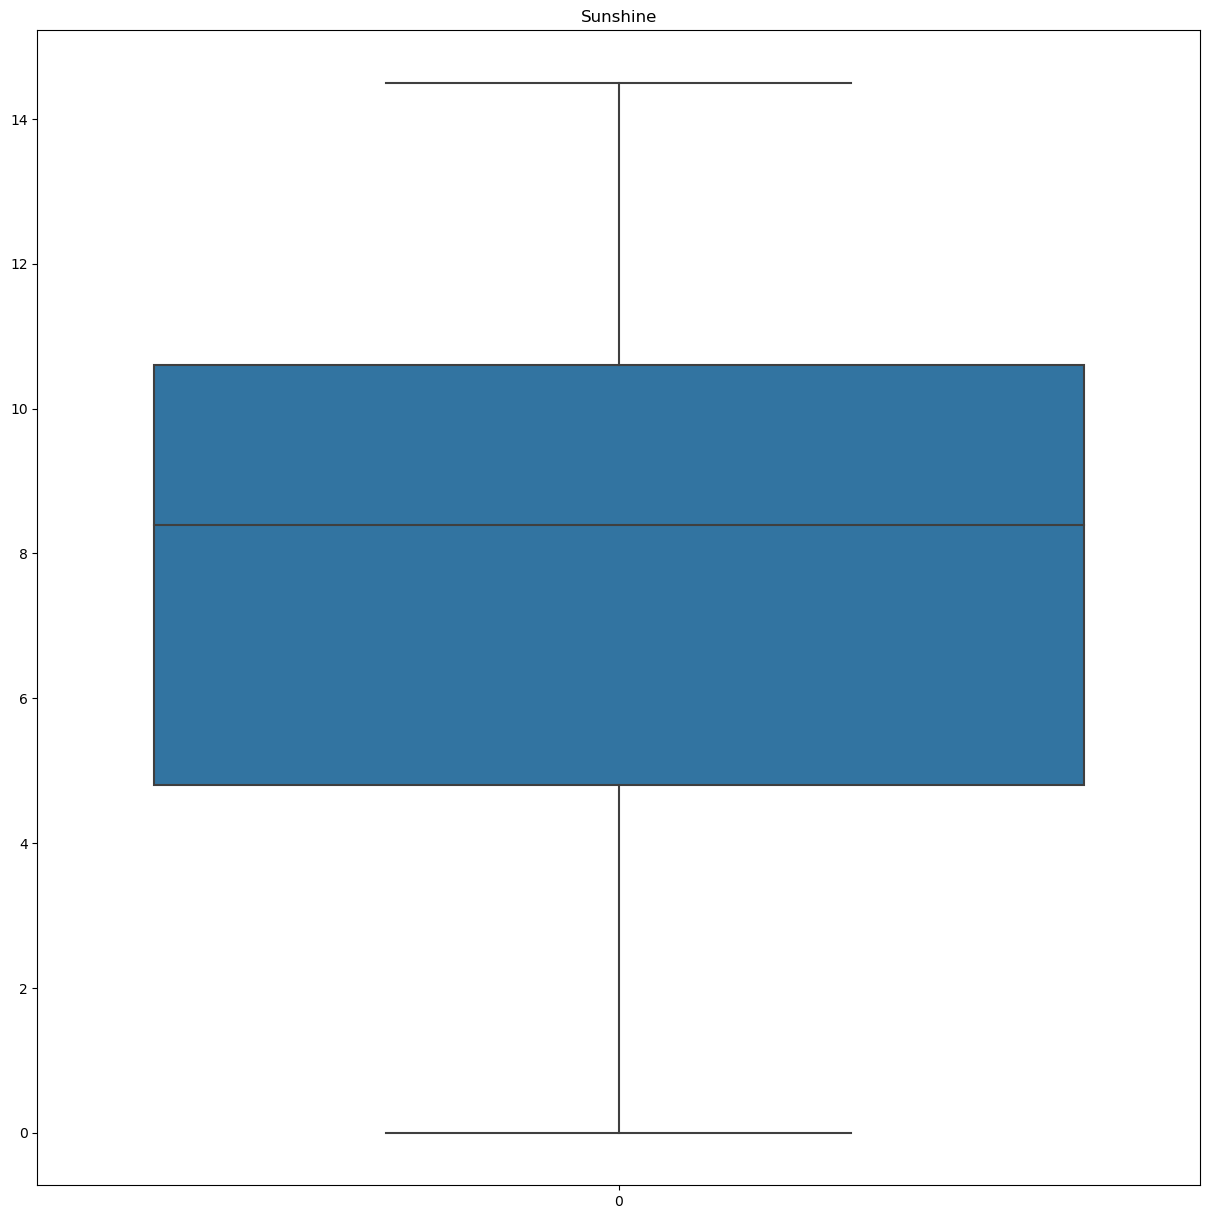

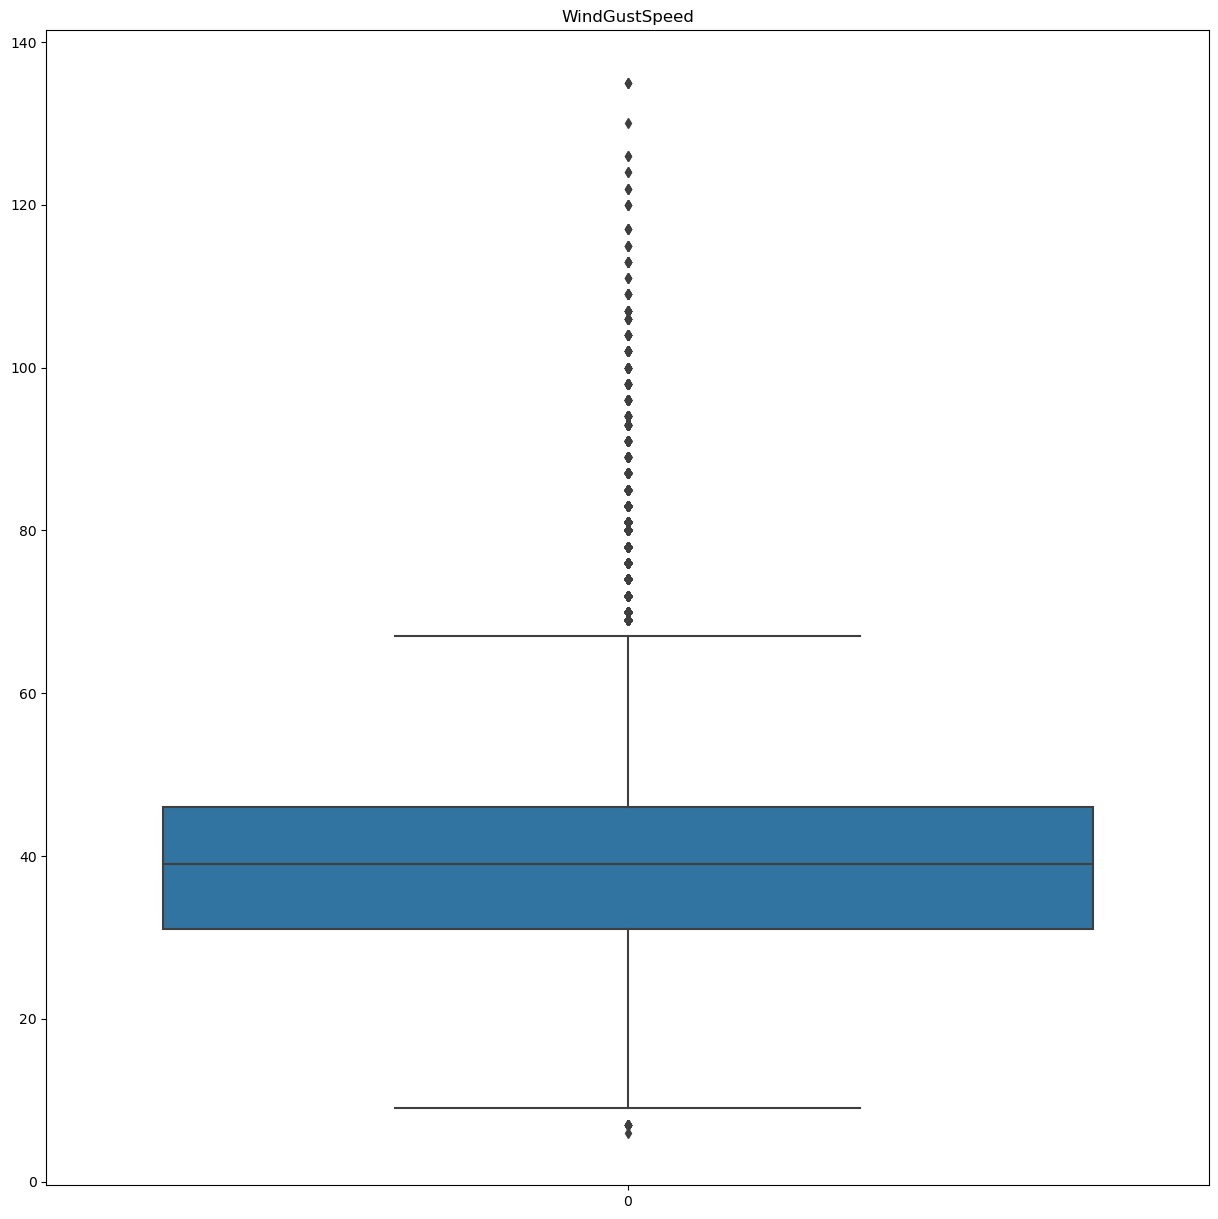

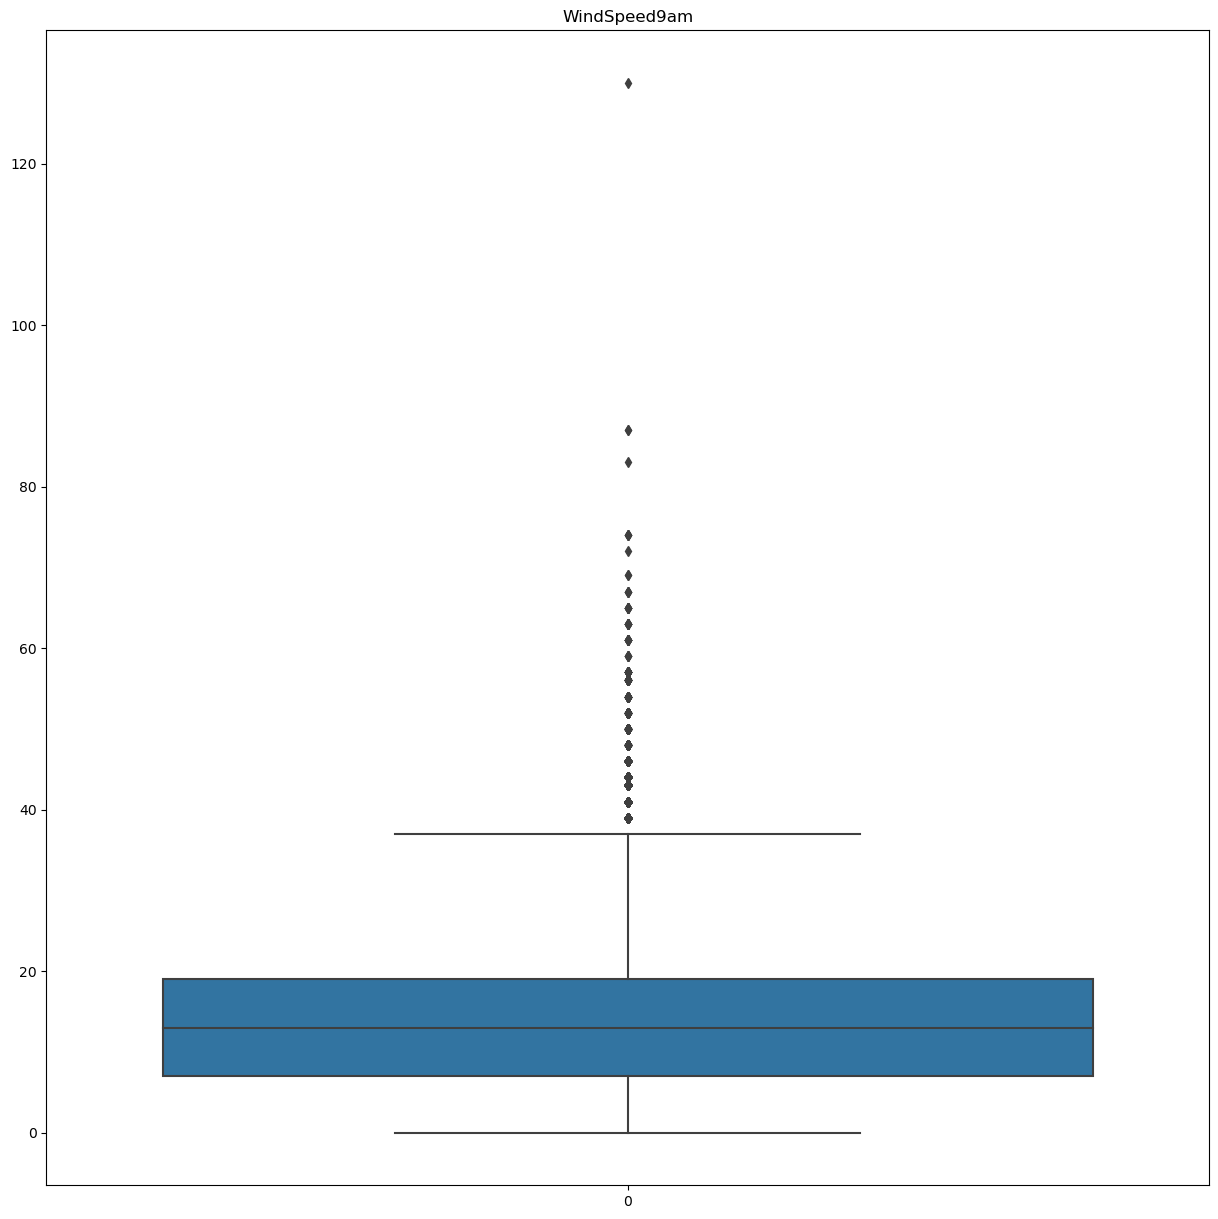

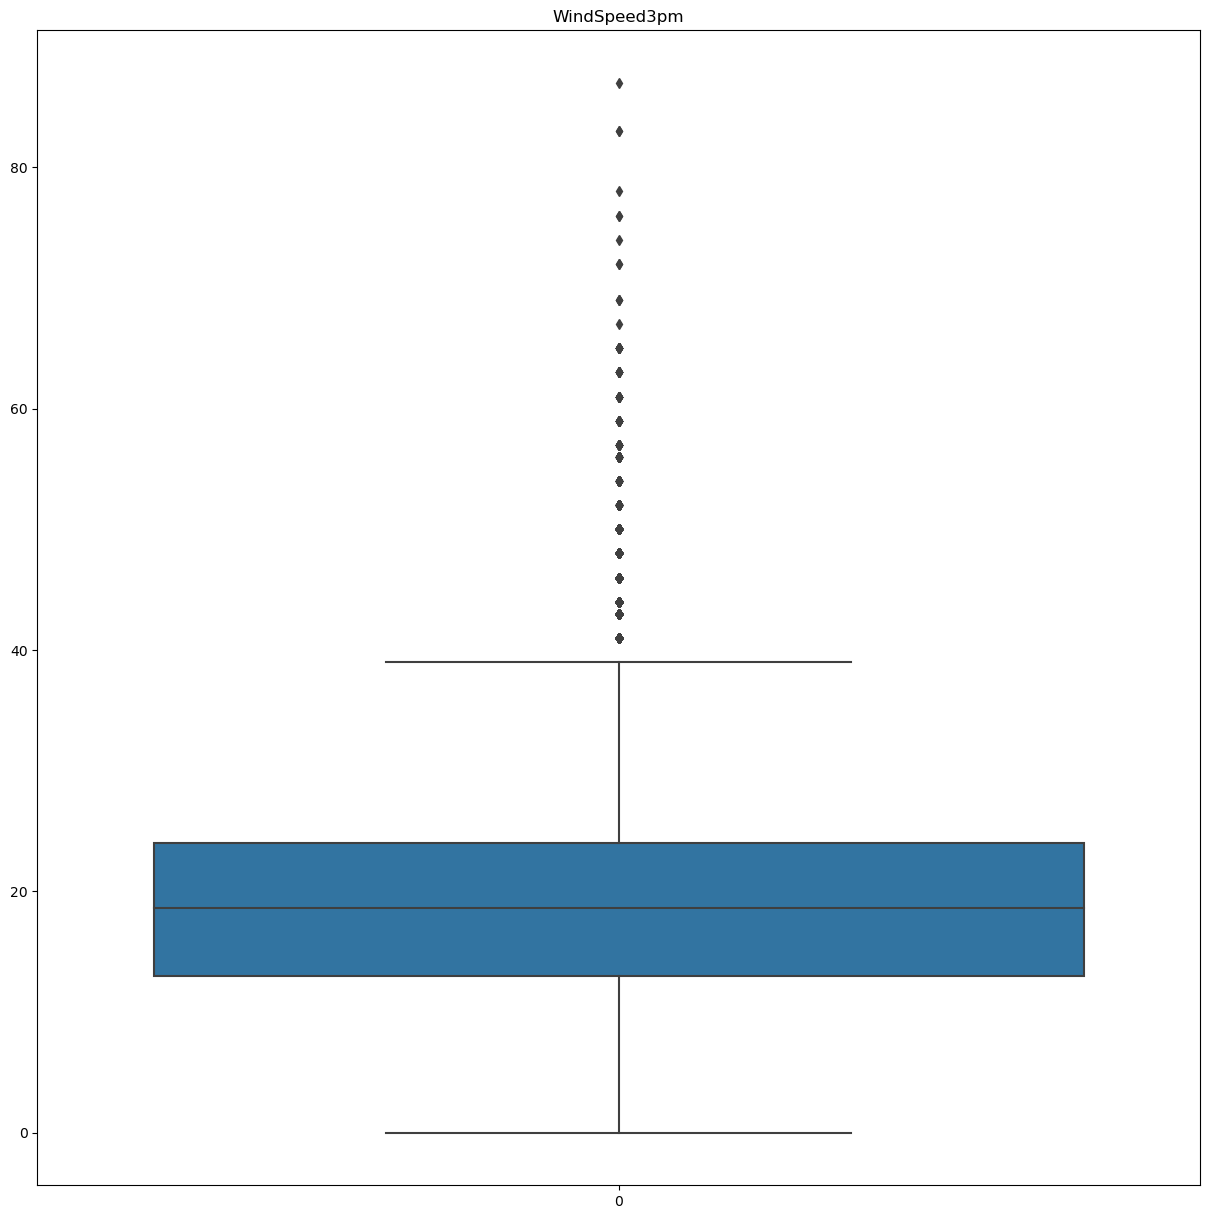

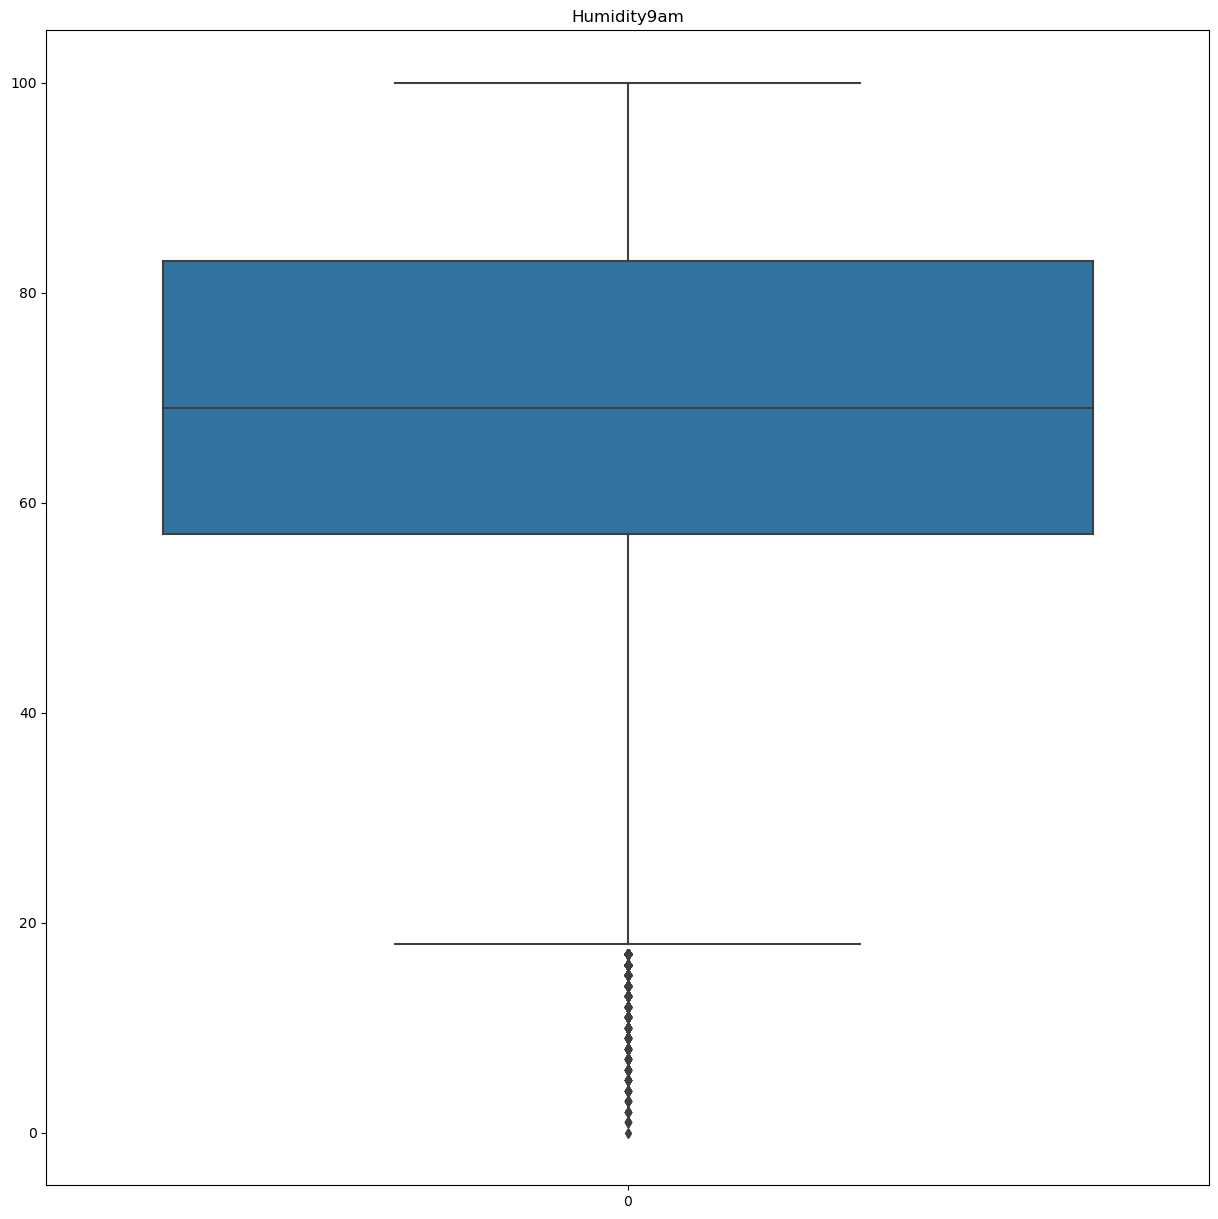

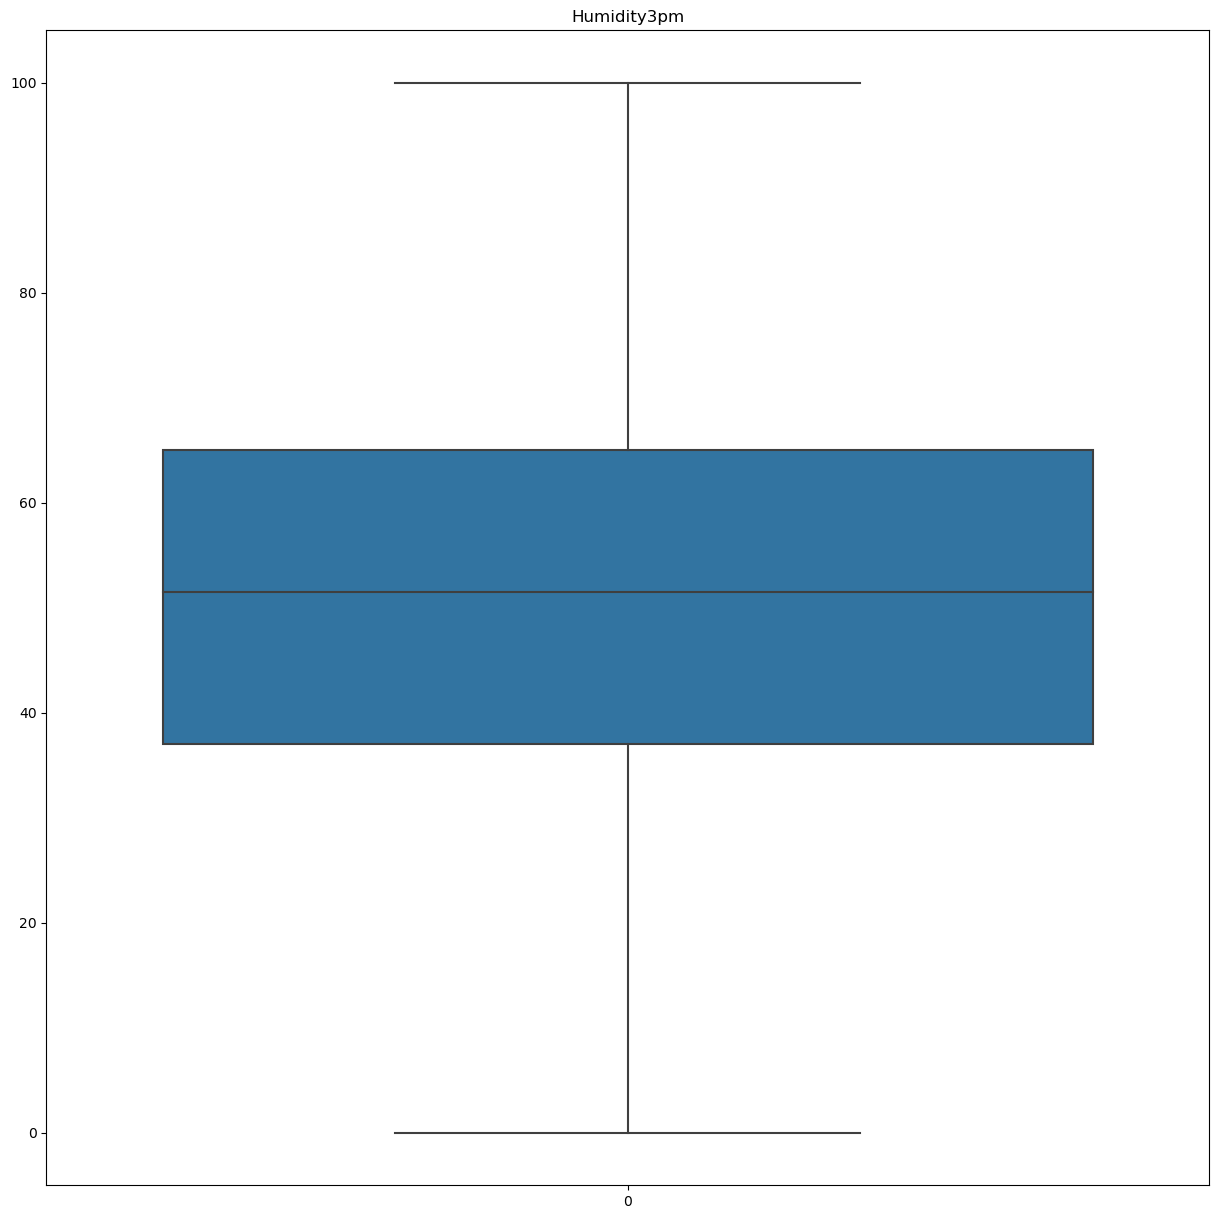

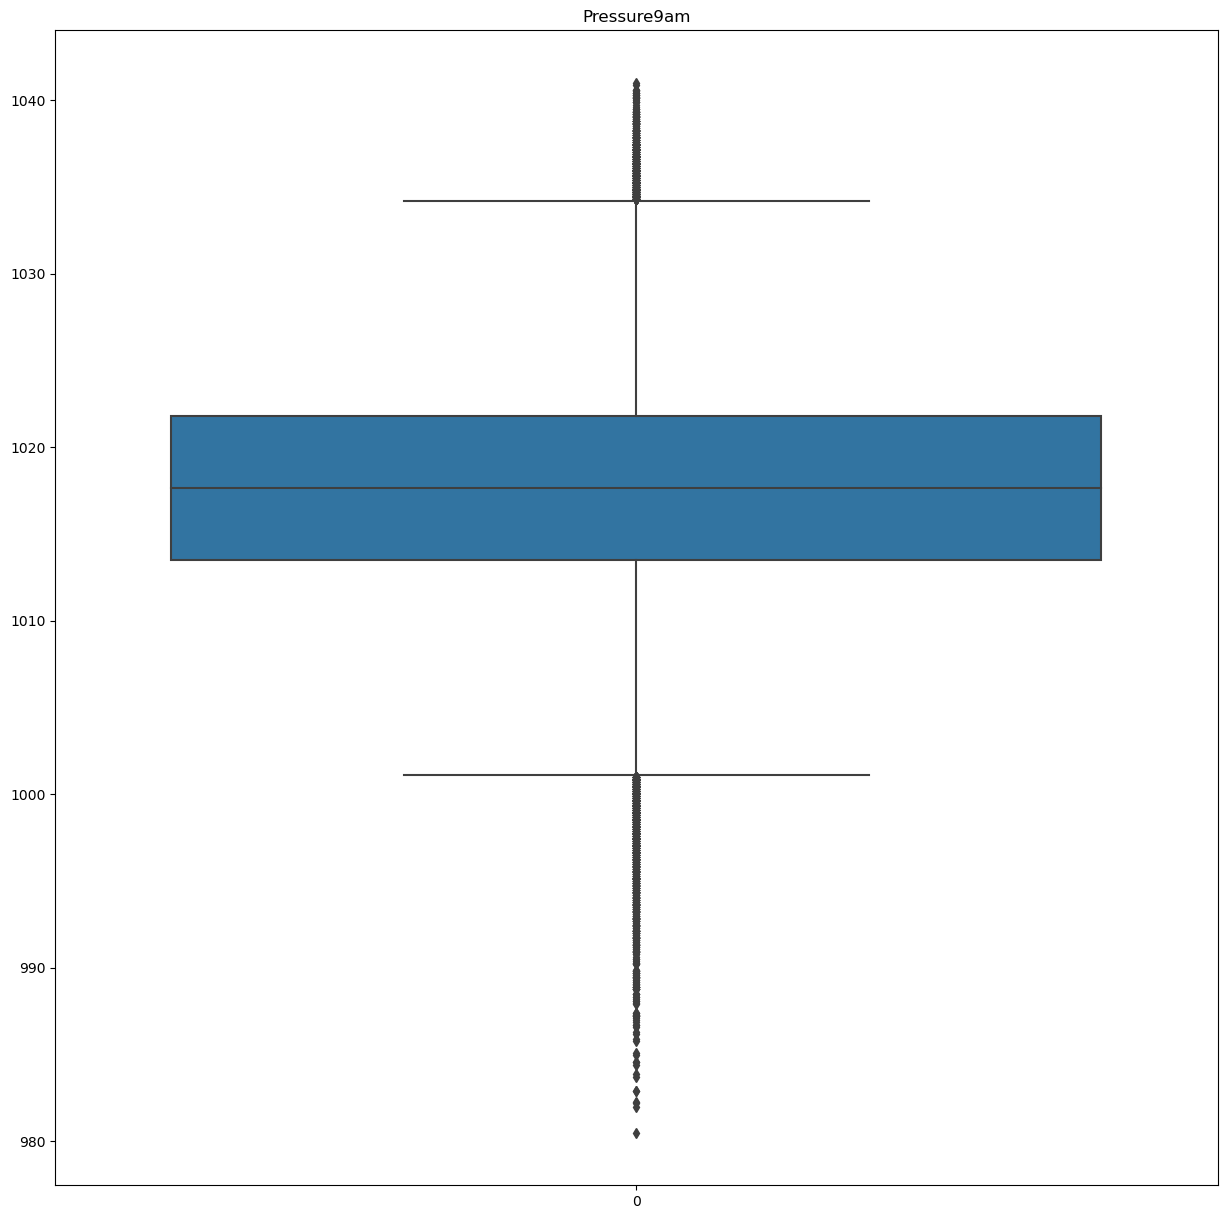

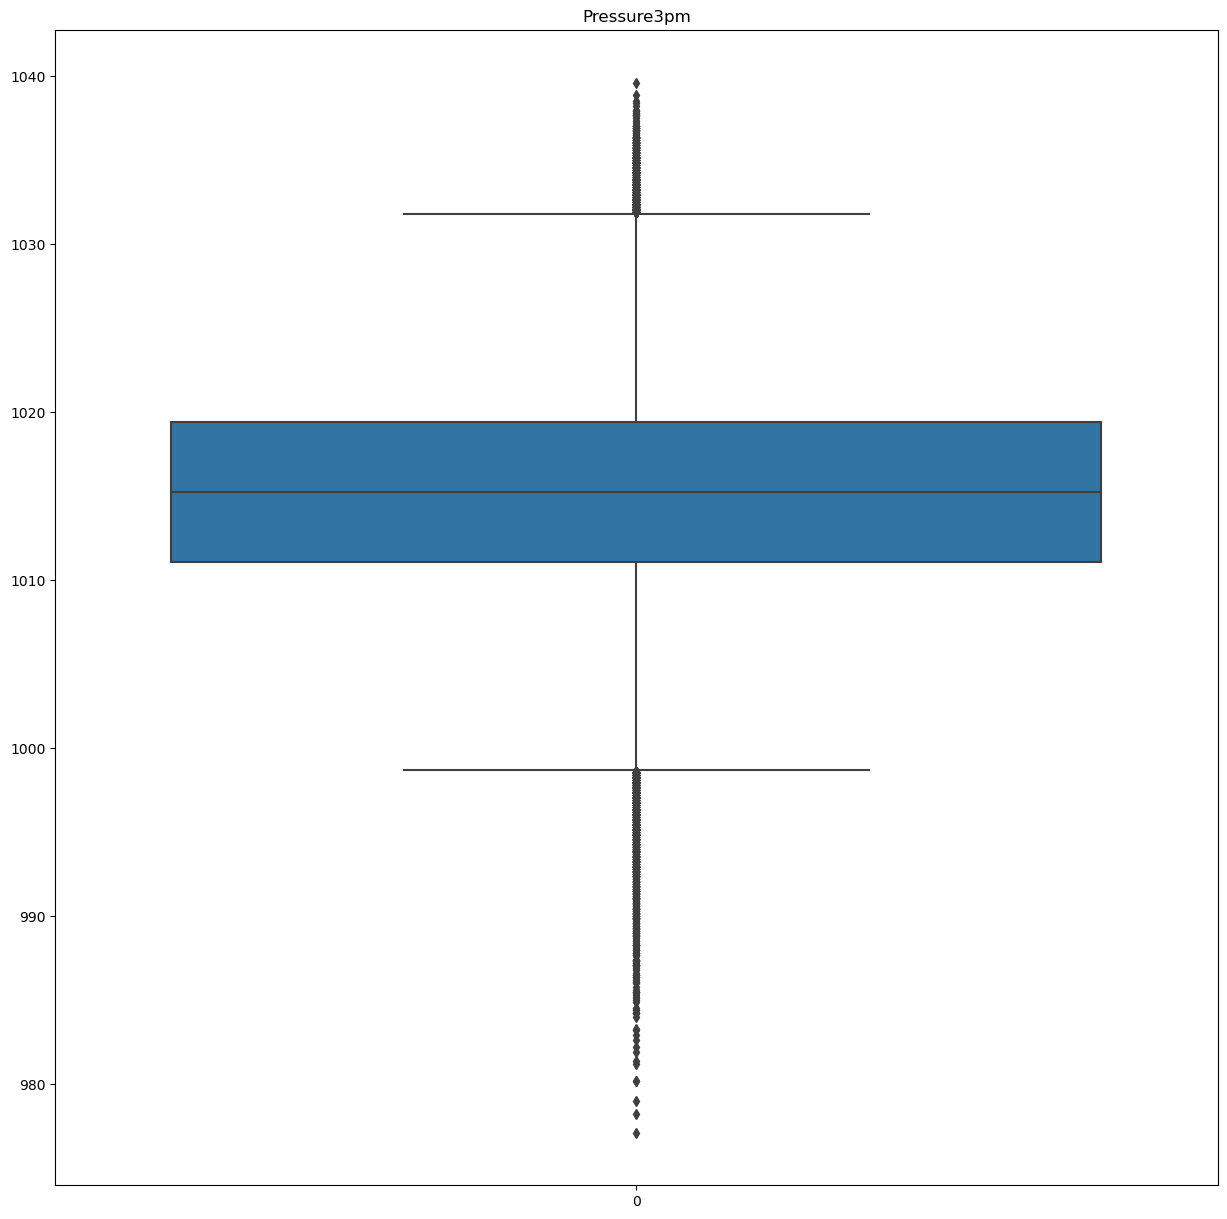

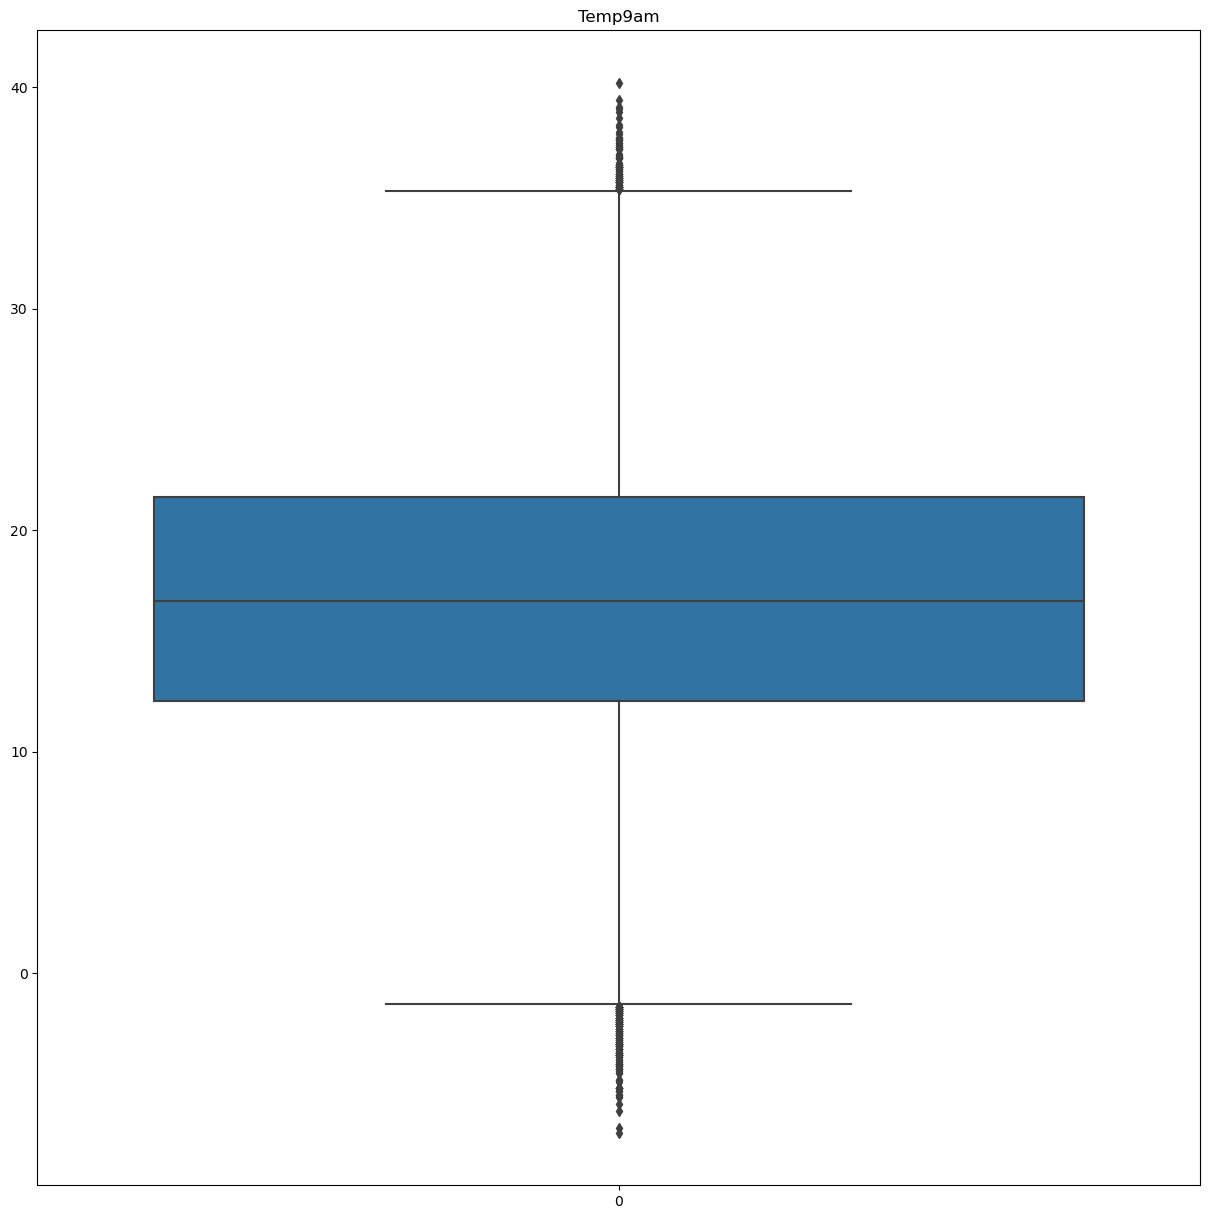

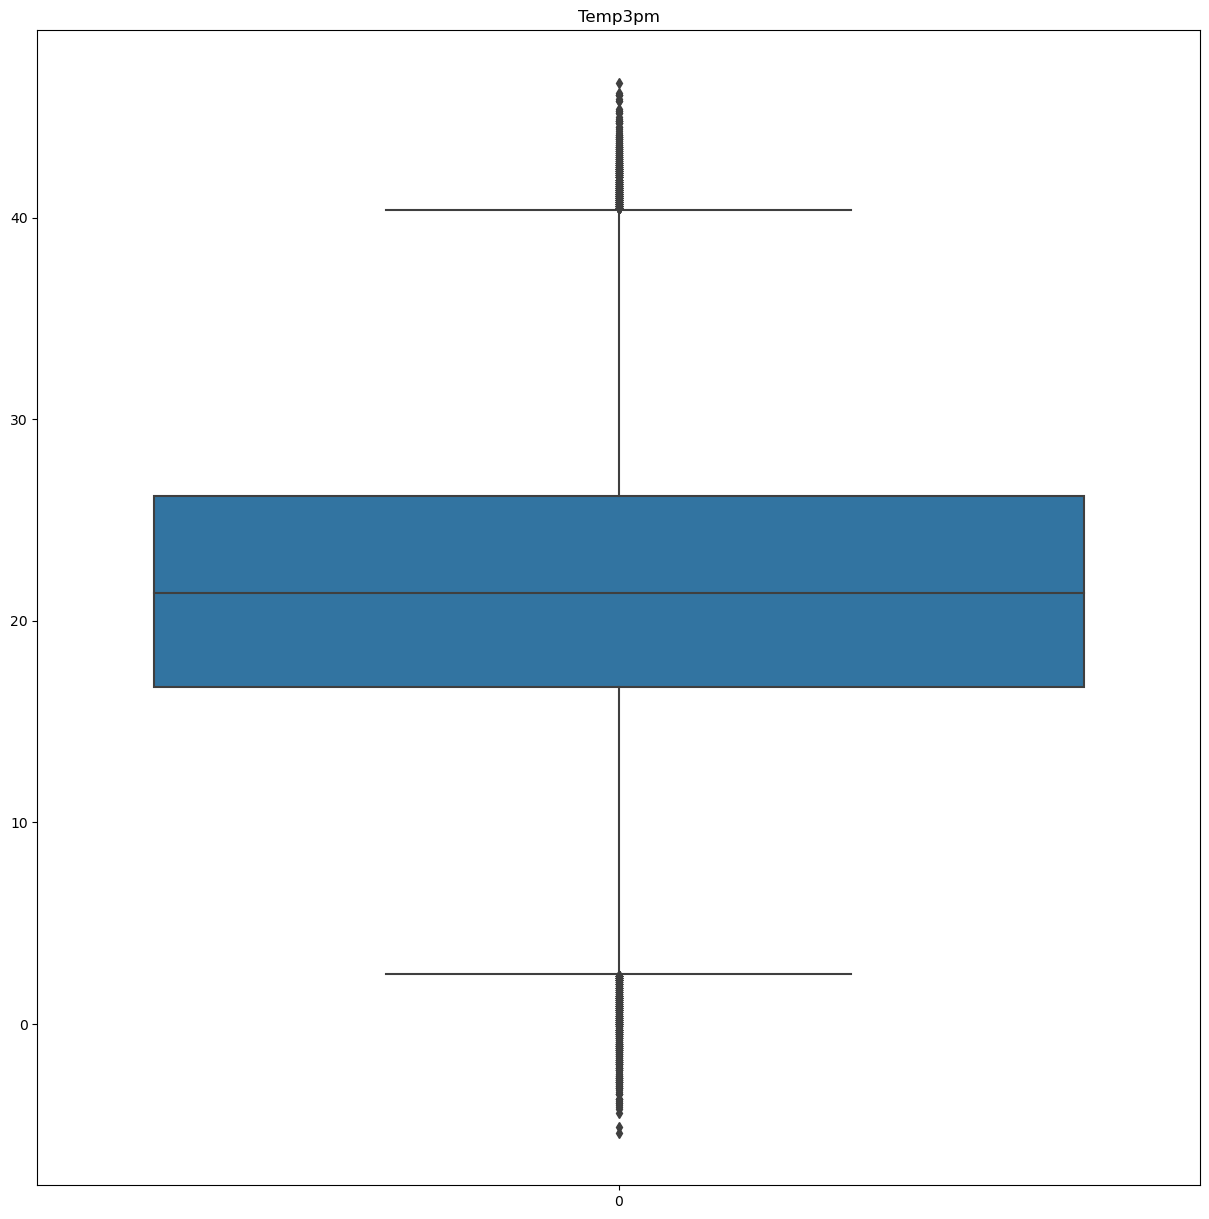

<Figure size 1500x1500 with 0 Axes>

In [87]:
#A for loop is used to plot boxplots for all the continuous features to see the outliers
for feature in continuous_feature:
    data=df.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(15,15))

In [88]:
# defining a function such that when passed a column, it will remove outliers from it and replace the original column with new.

def remove_outliers(df, column_name, threshold=3):
    # Calculate z-scores
    z_scores = np.abs((df[column_name] - df[column_name].mean()) / df[column_name].std())
    
    # Create a mask for outliers
    mask = z_scores < threshold
    
    # Replace outliers with NaN
    df[column_name] = df[column_name].mask(~mask, np.nan)
    
    # Replace NaN with column mean
    df[column_name].fillna(df[column_name].mean(), inplace=True)
    
    return df

In [89]:
# iterating all the continous features to the outliers removal function
for feature in continuous_feature:
    df = remove_outliers(df,feature)

In [90]:
# iterating all the continous features to the outliers removal function
for feature in continuous_feature:
    df = remove_outliers(df,feature)

In [91]:
# iterating all the continous features to the outliers removal function
for feature in continuous_feature:
    df = remove_outliers(df,feature)

In [92]:
# iterating all the continous features to the outliers removal function
for feature in continuous_feature:
    df = remove_outliers(df,feature)

In [93]:
# iterating all the continous features to the outliers removal function
for feature in continuous_feature:
    df = remove_outliers(df,feature)

In [94]:
# iterating all the continous features to the outliers removal function
for feature in continuous_feature:
    df = remove_outliers(df,feature)

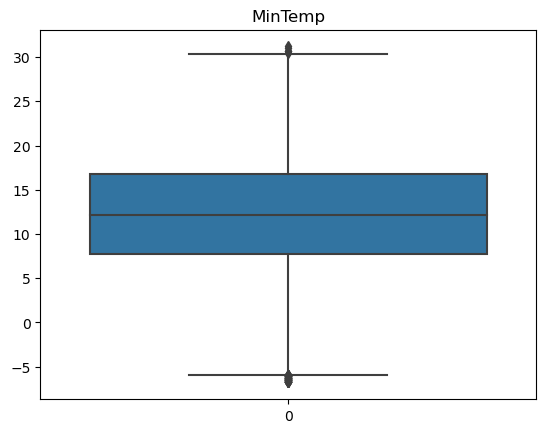

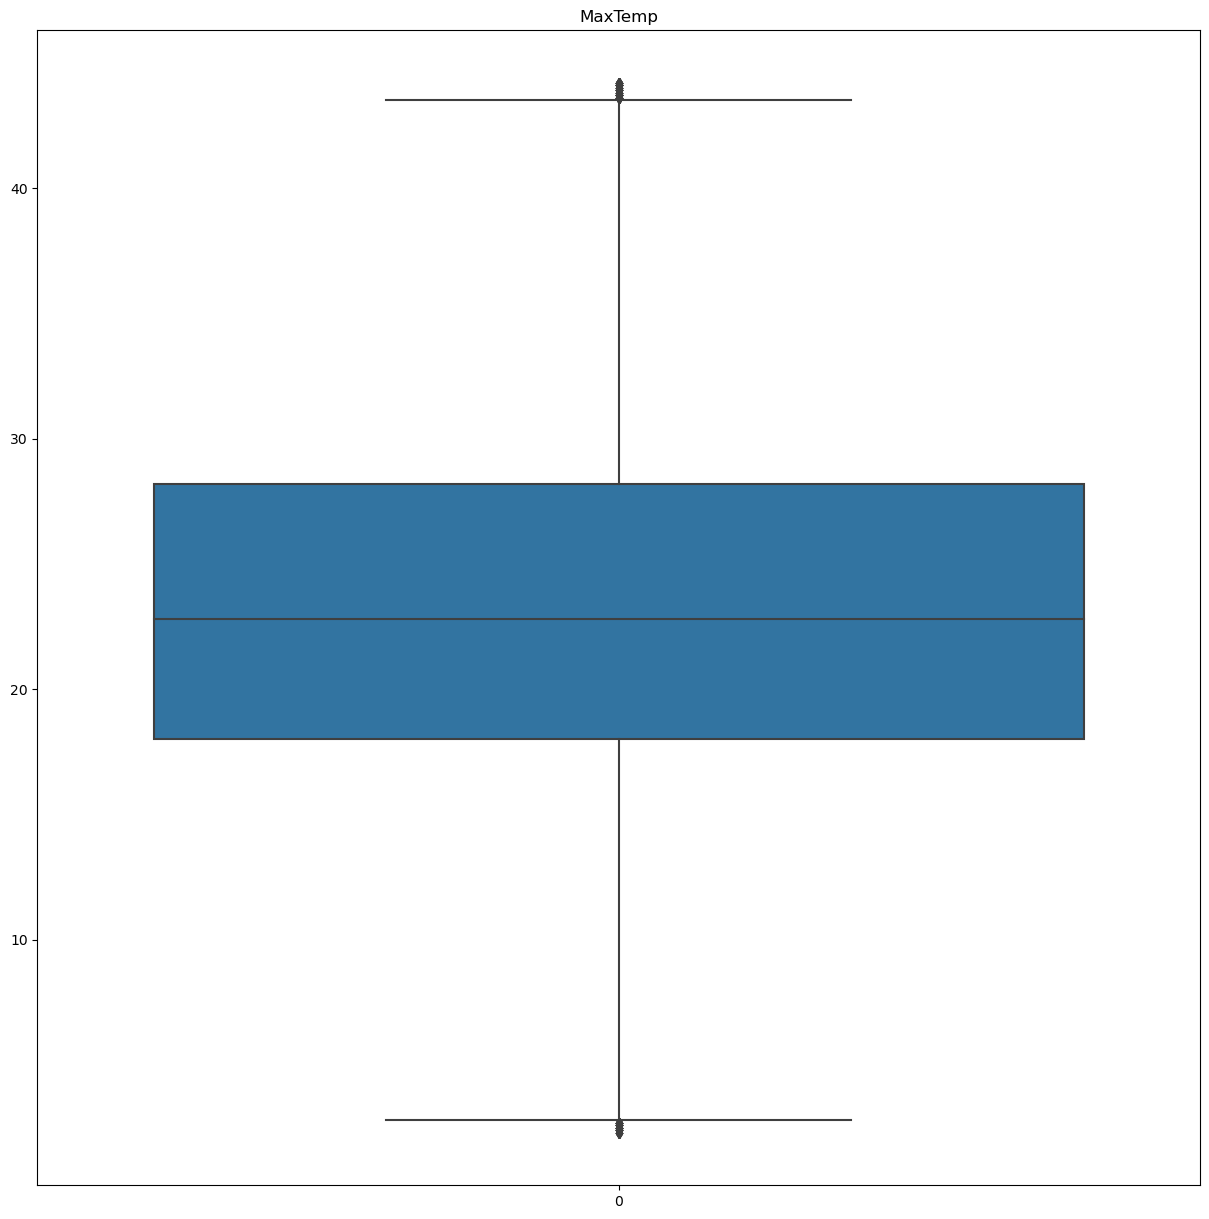

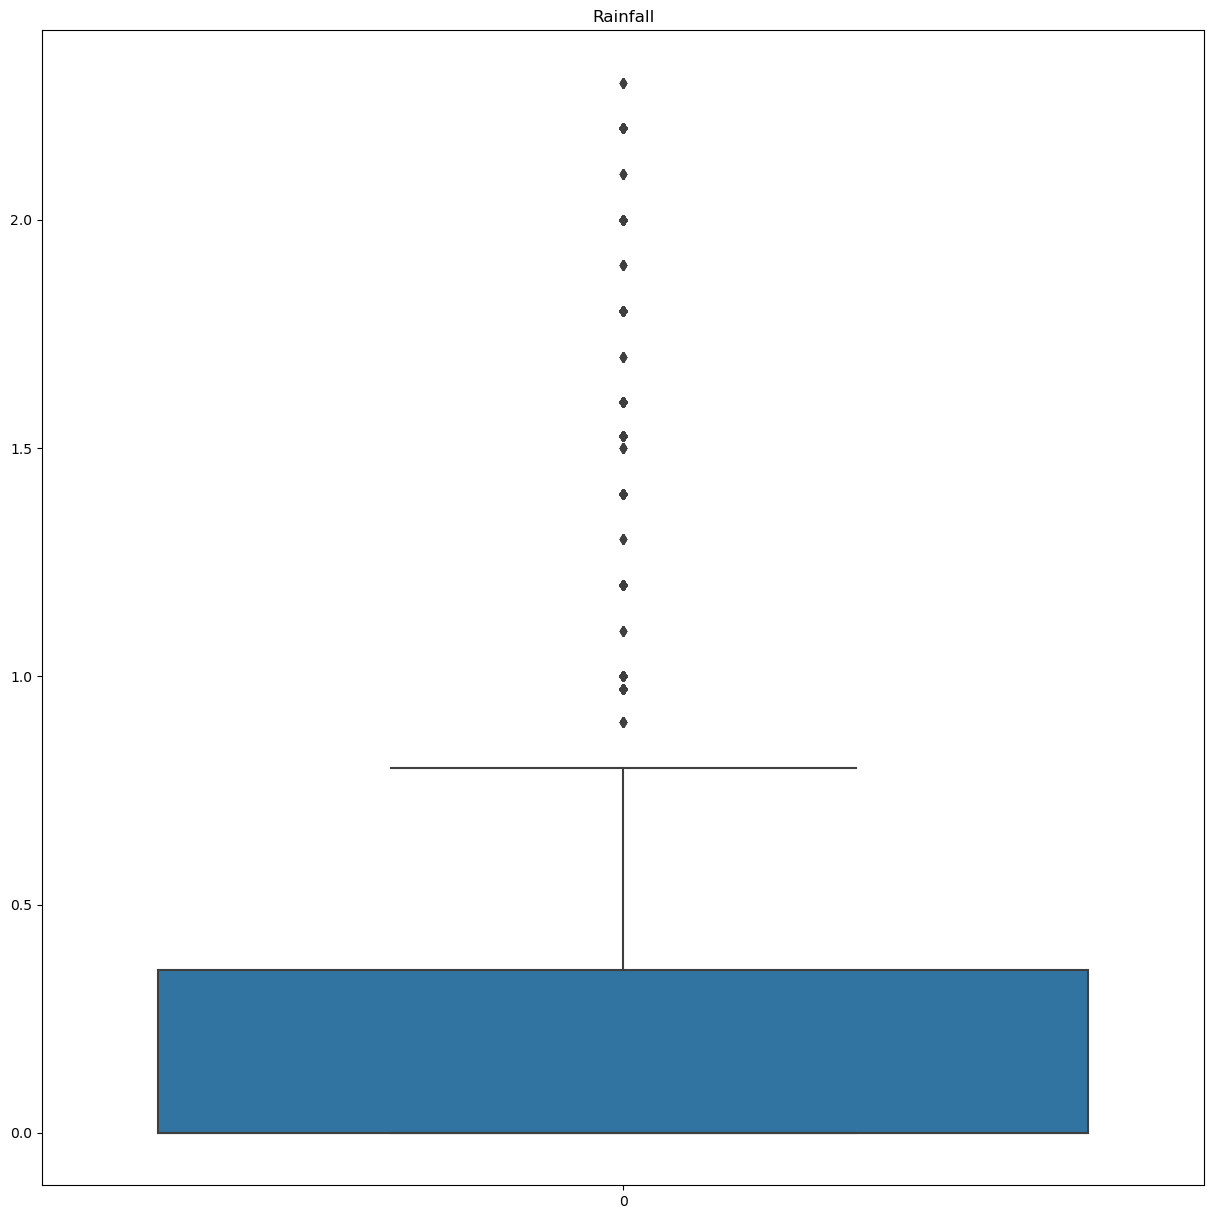

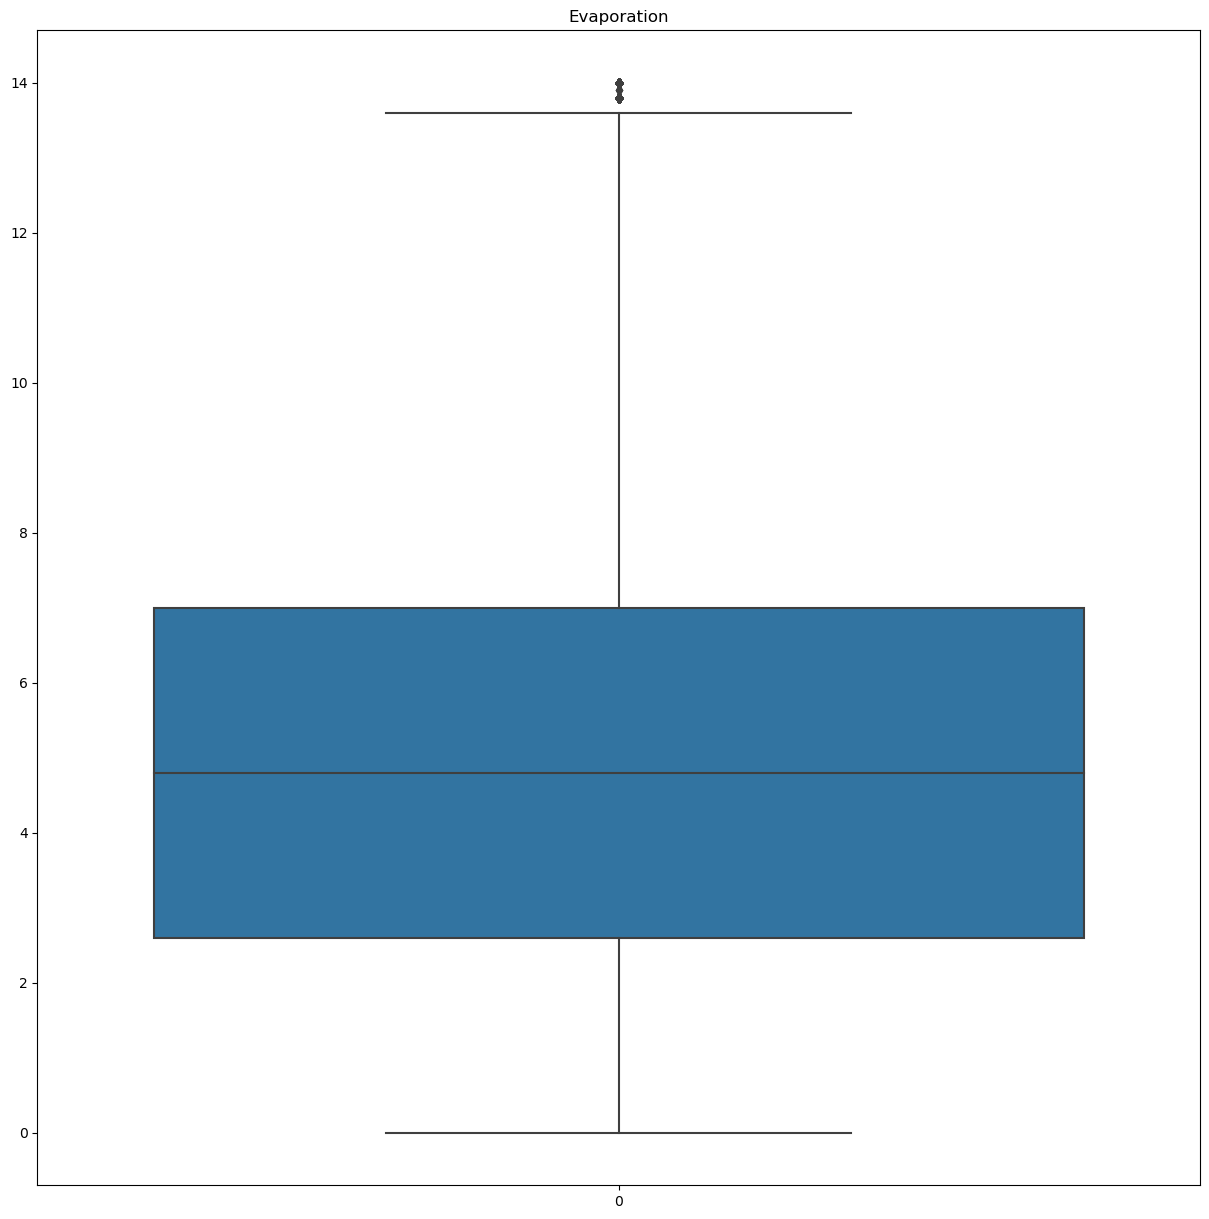

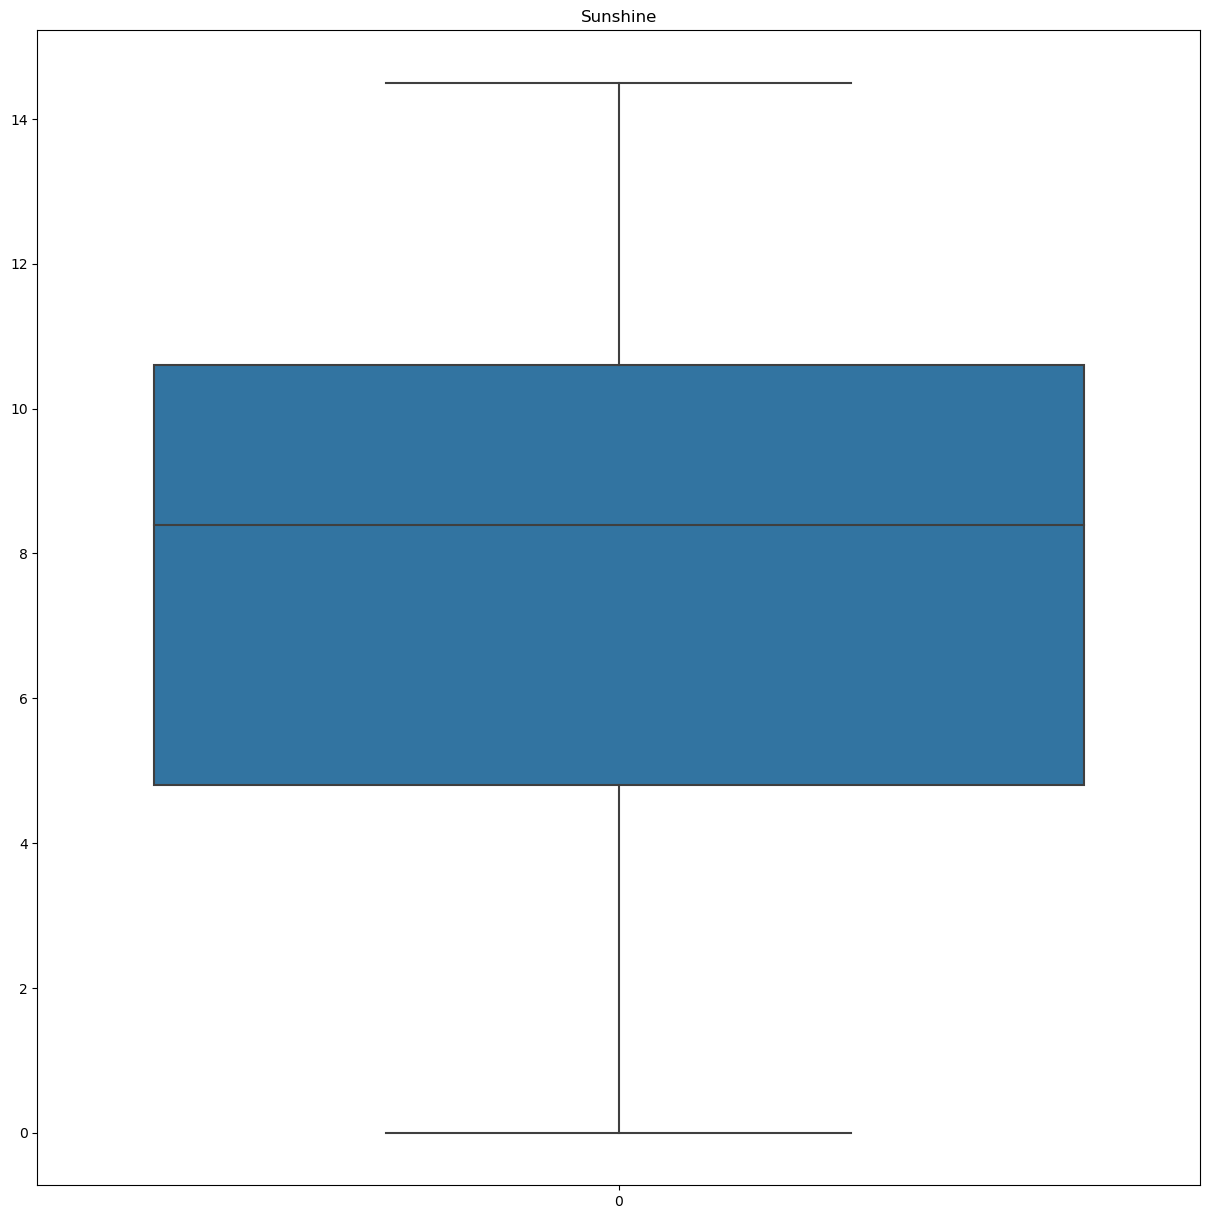

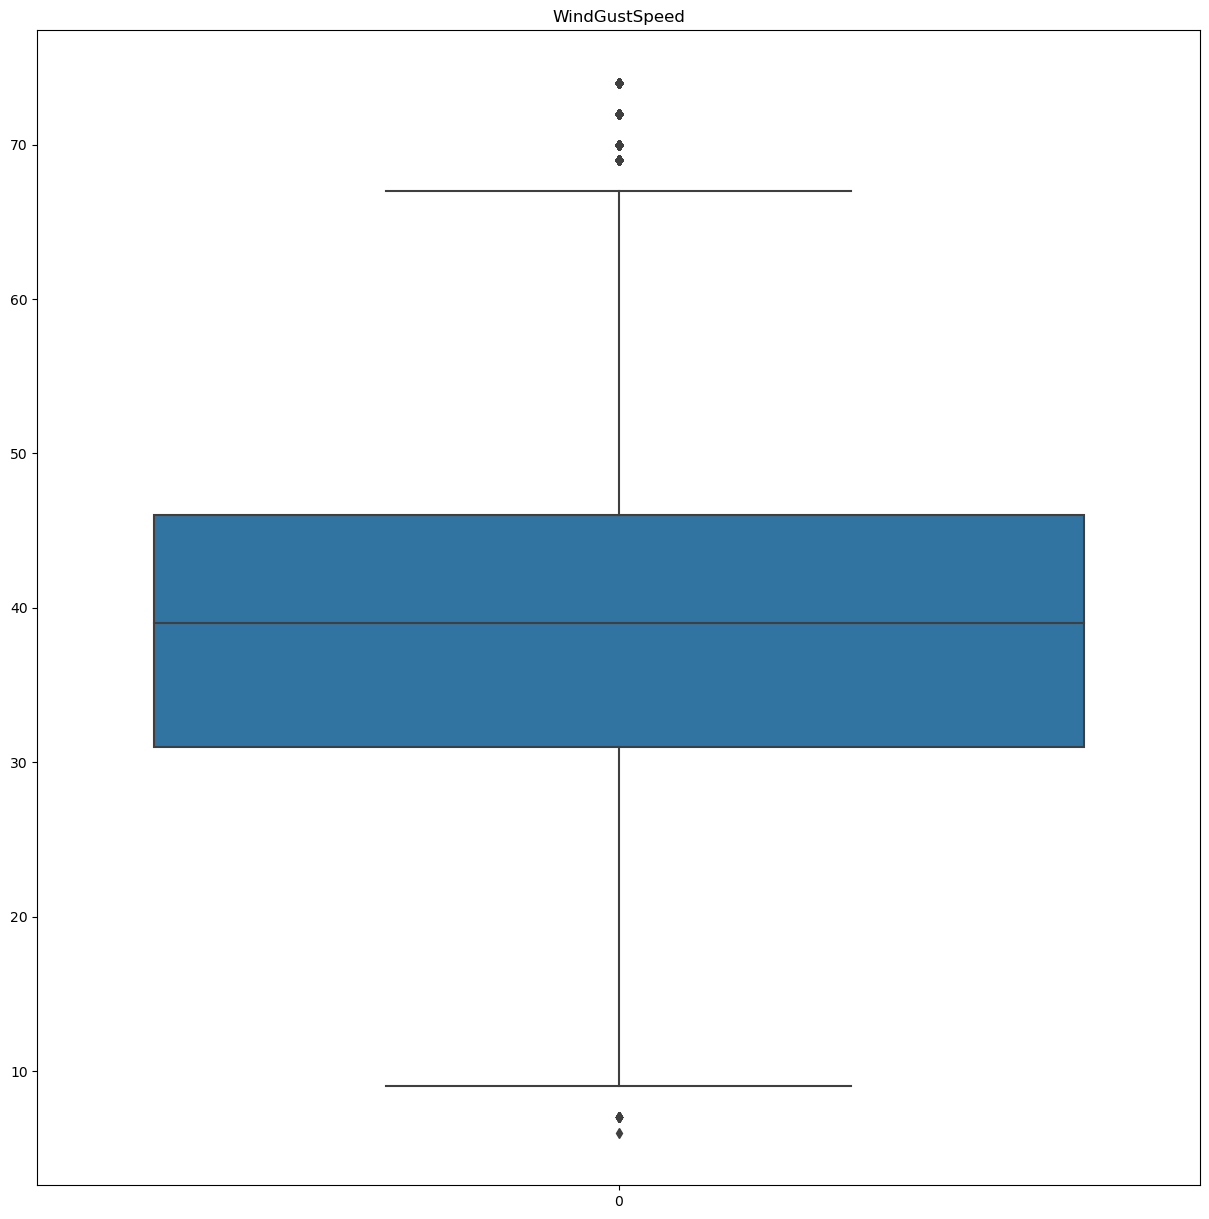

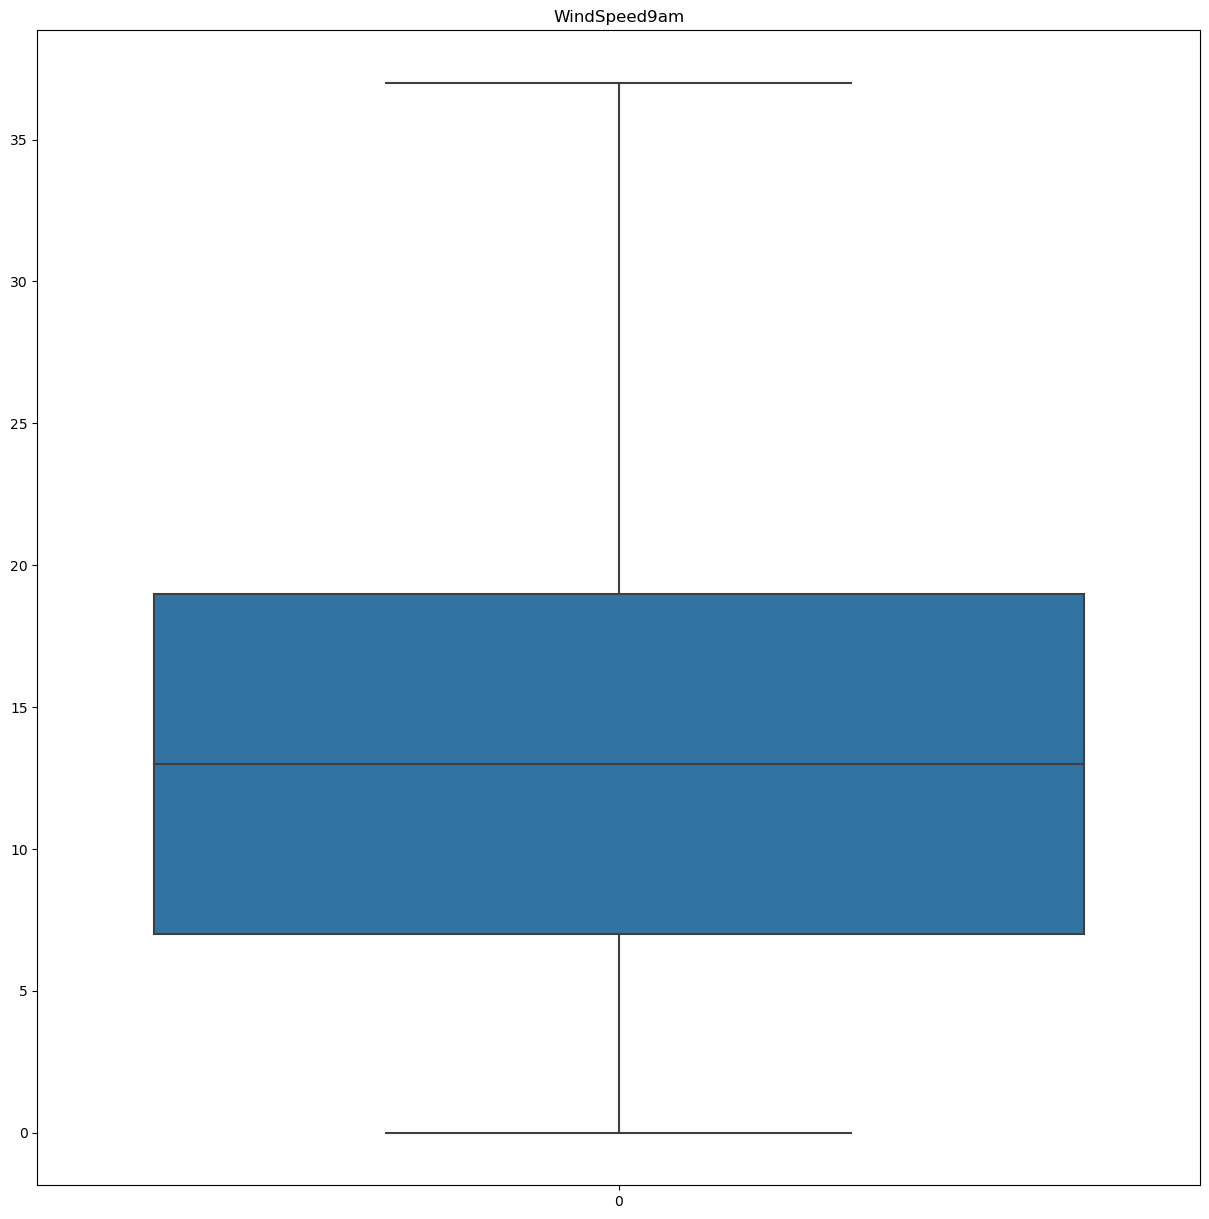

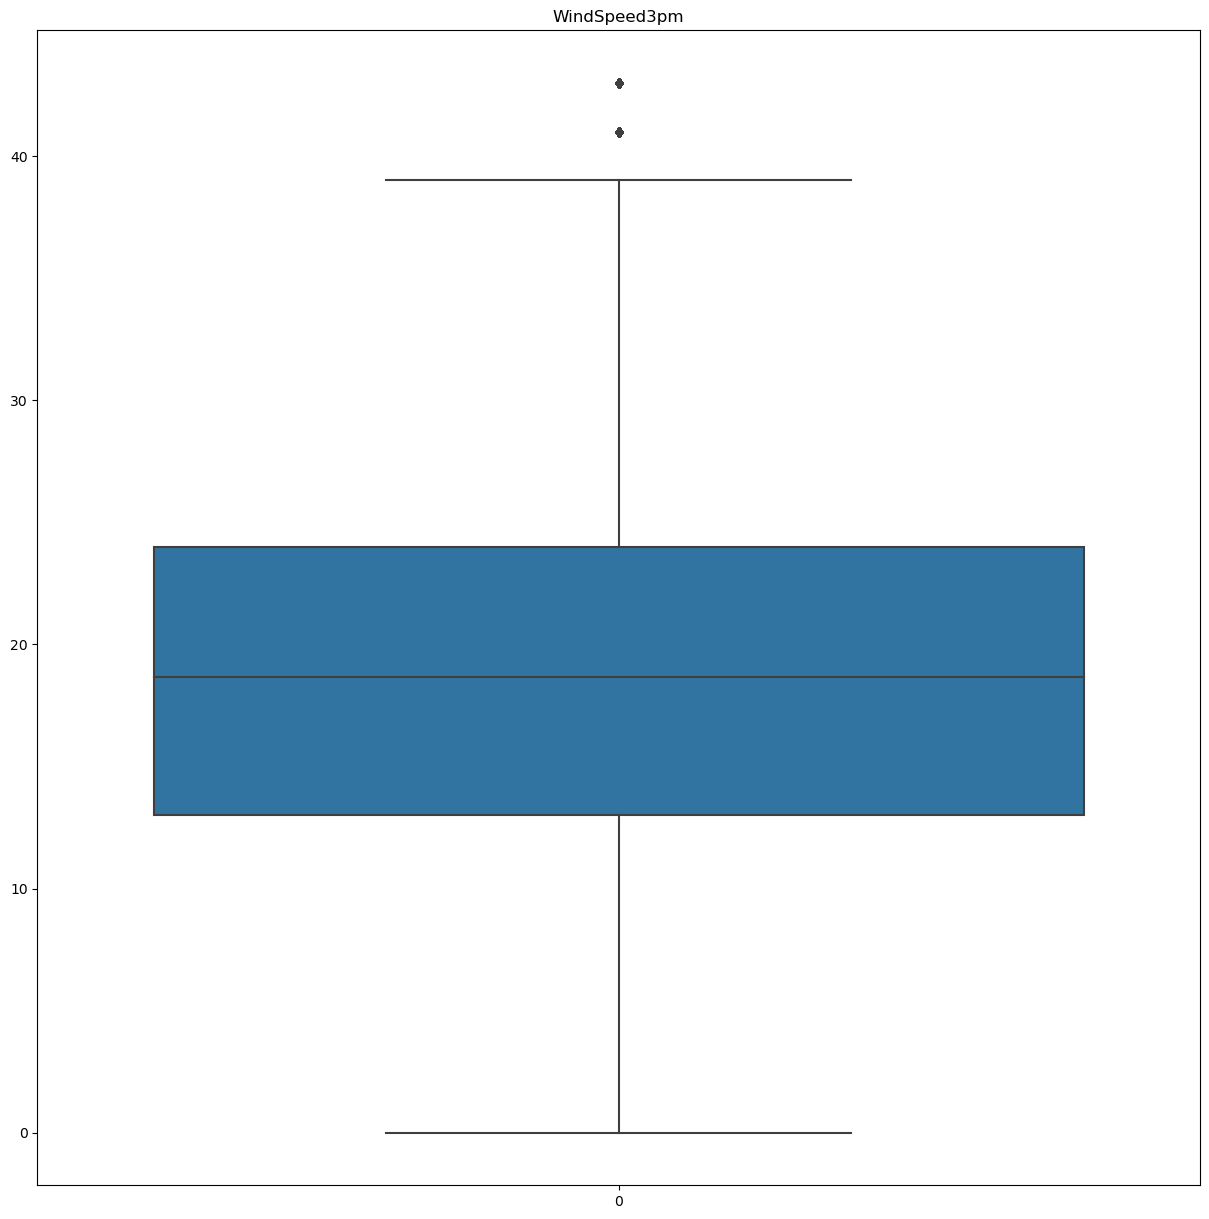

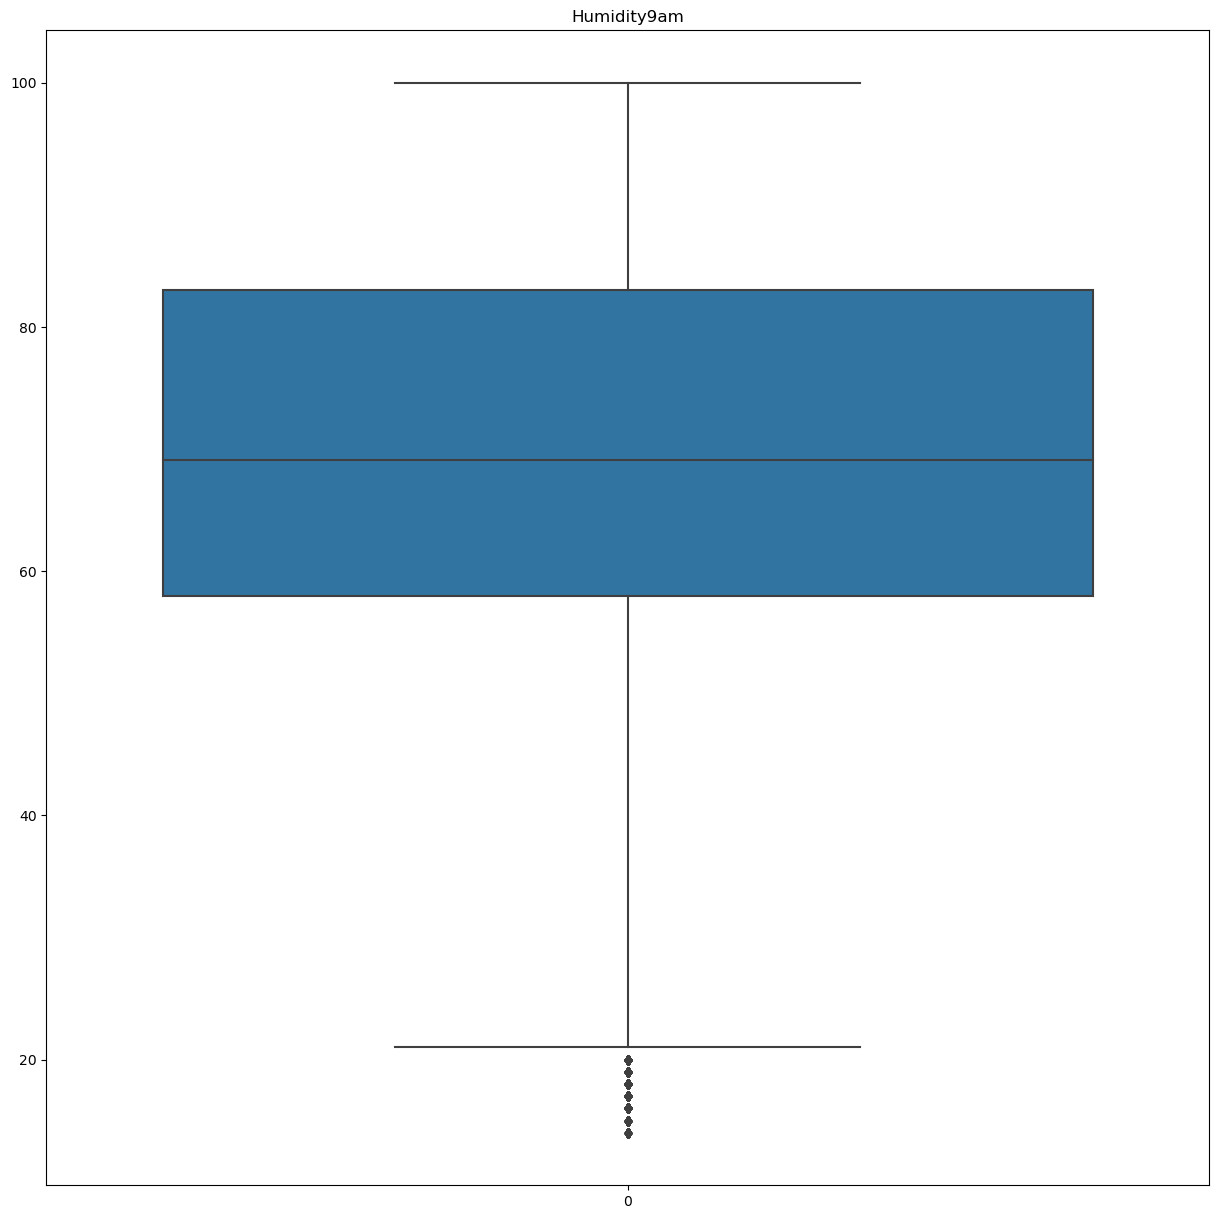

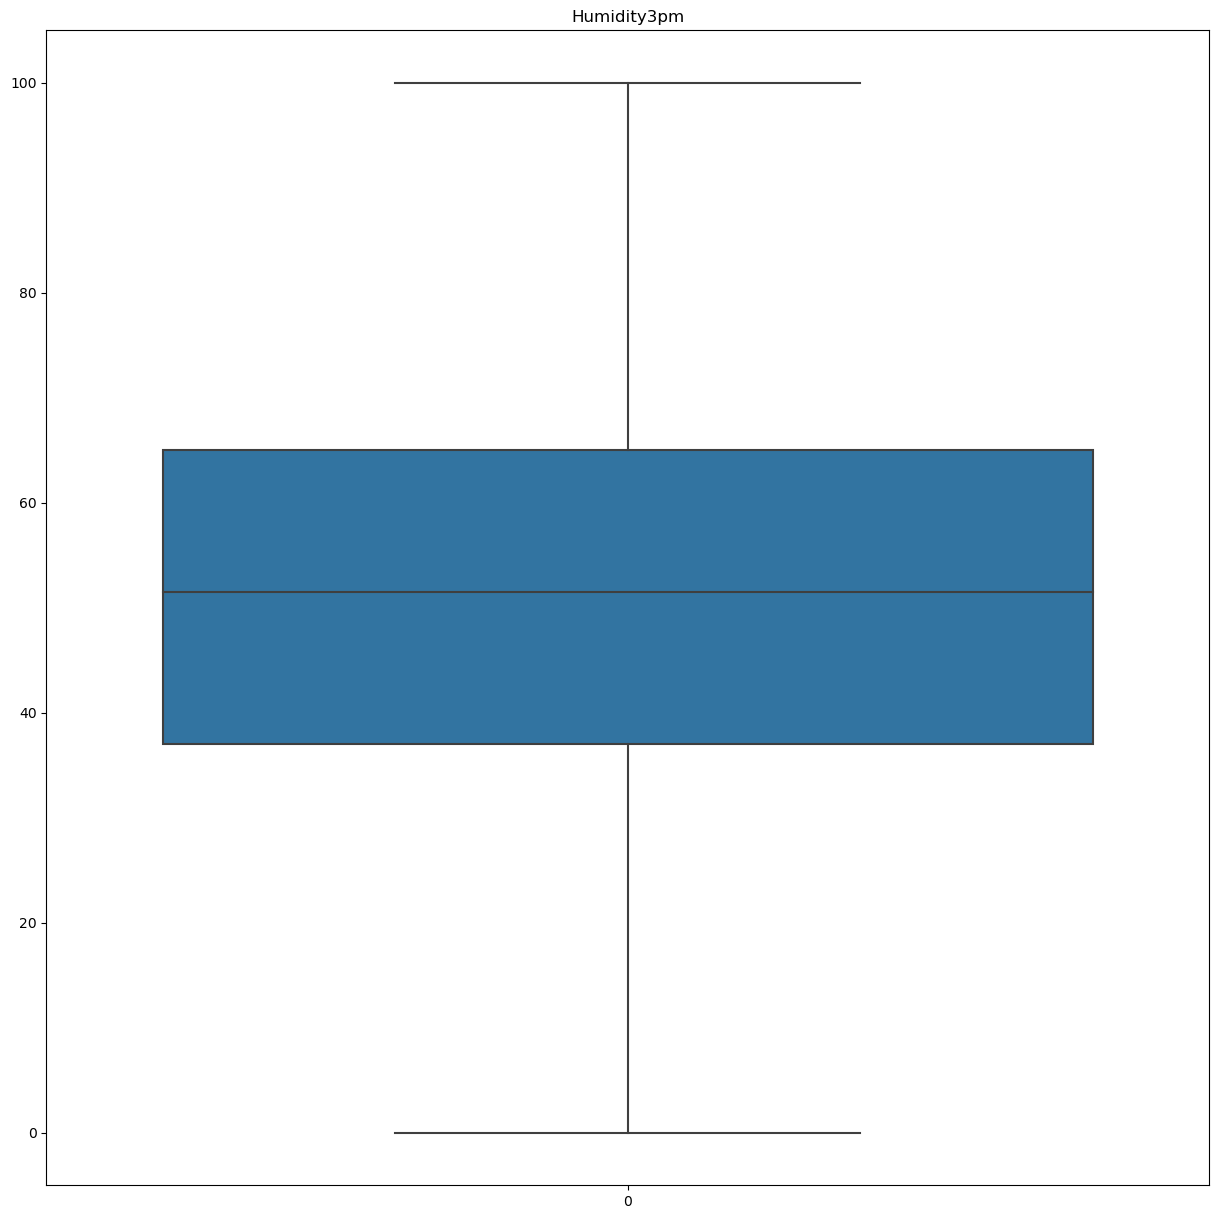

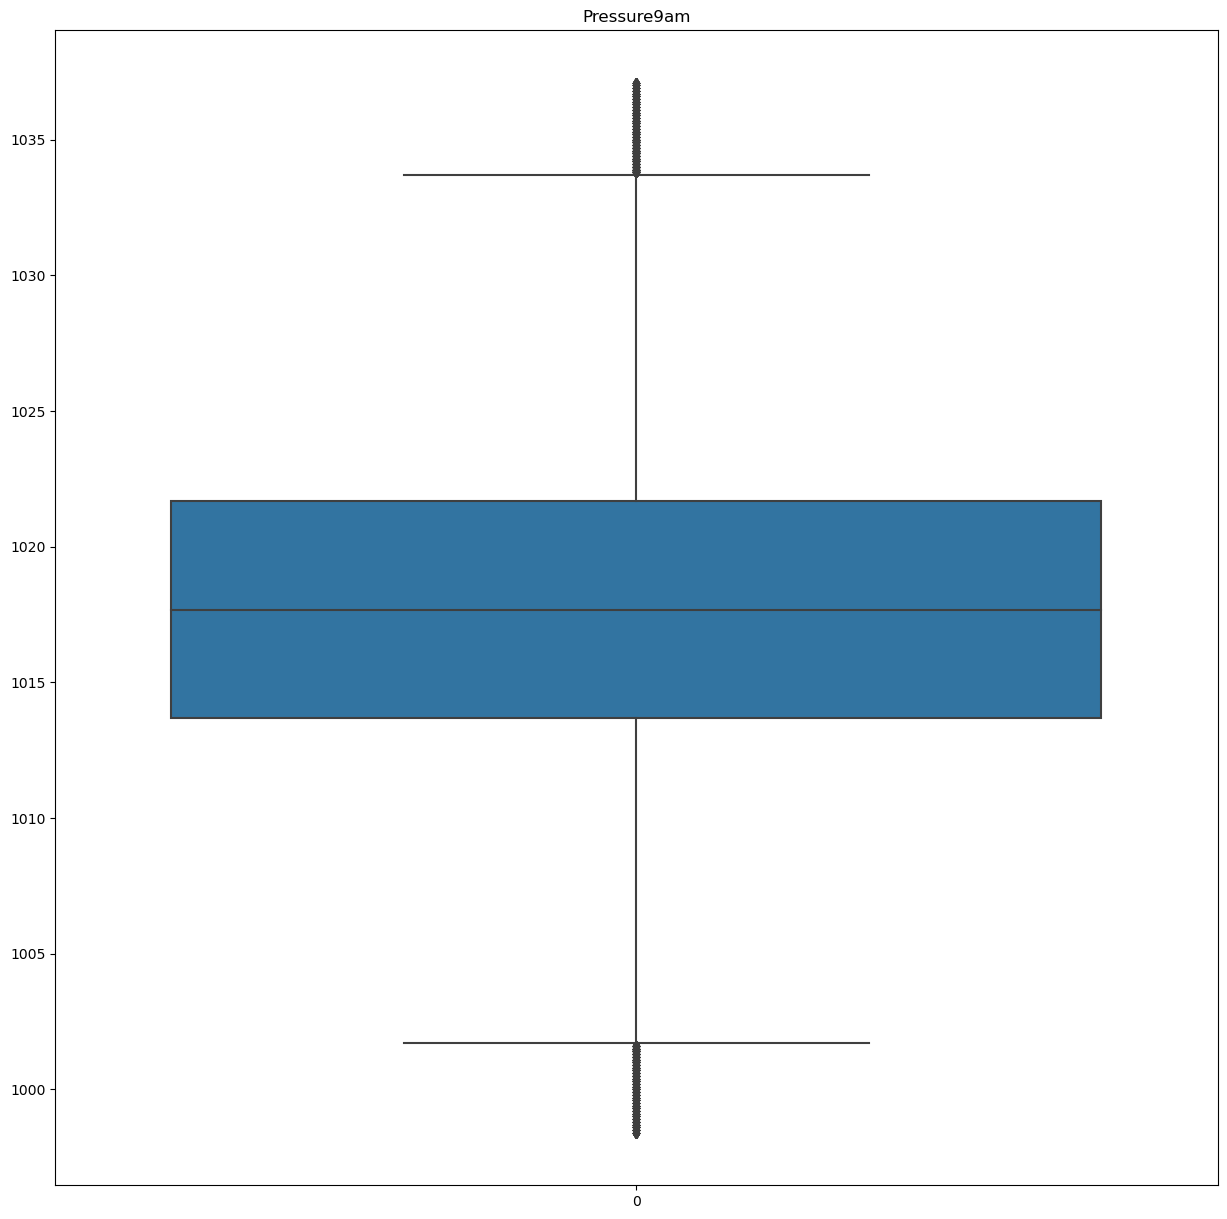

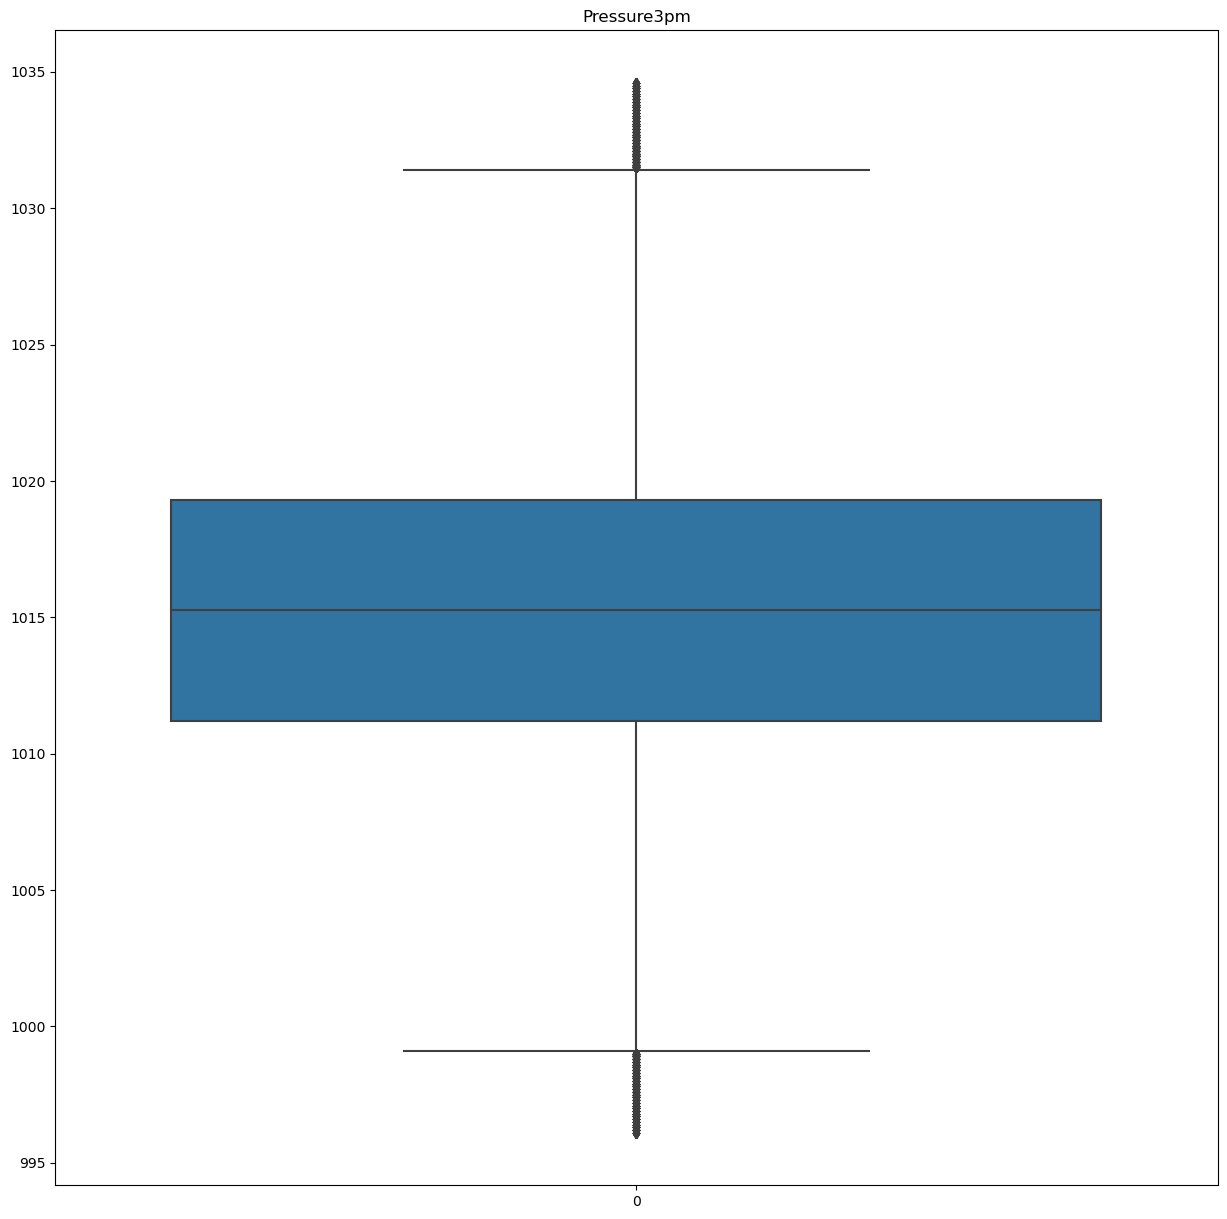

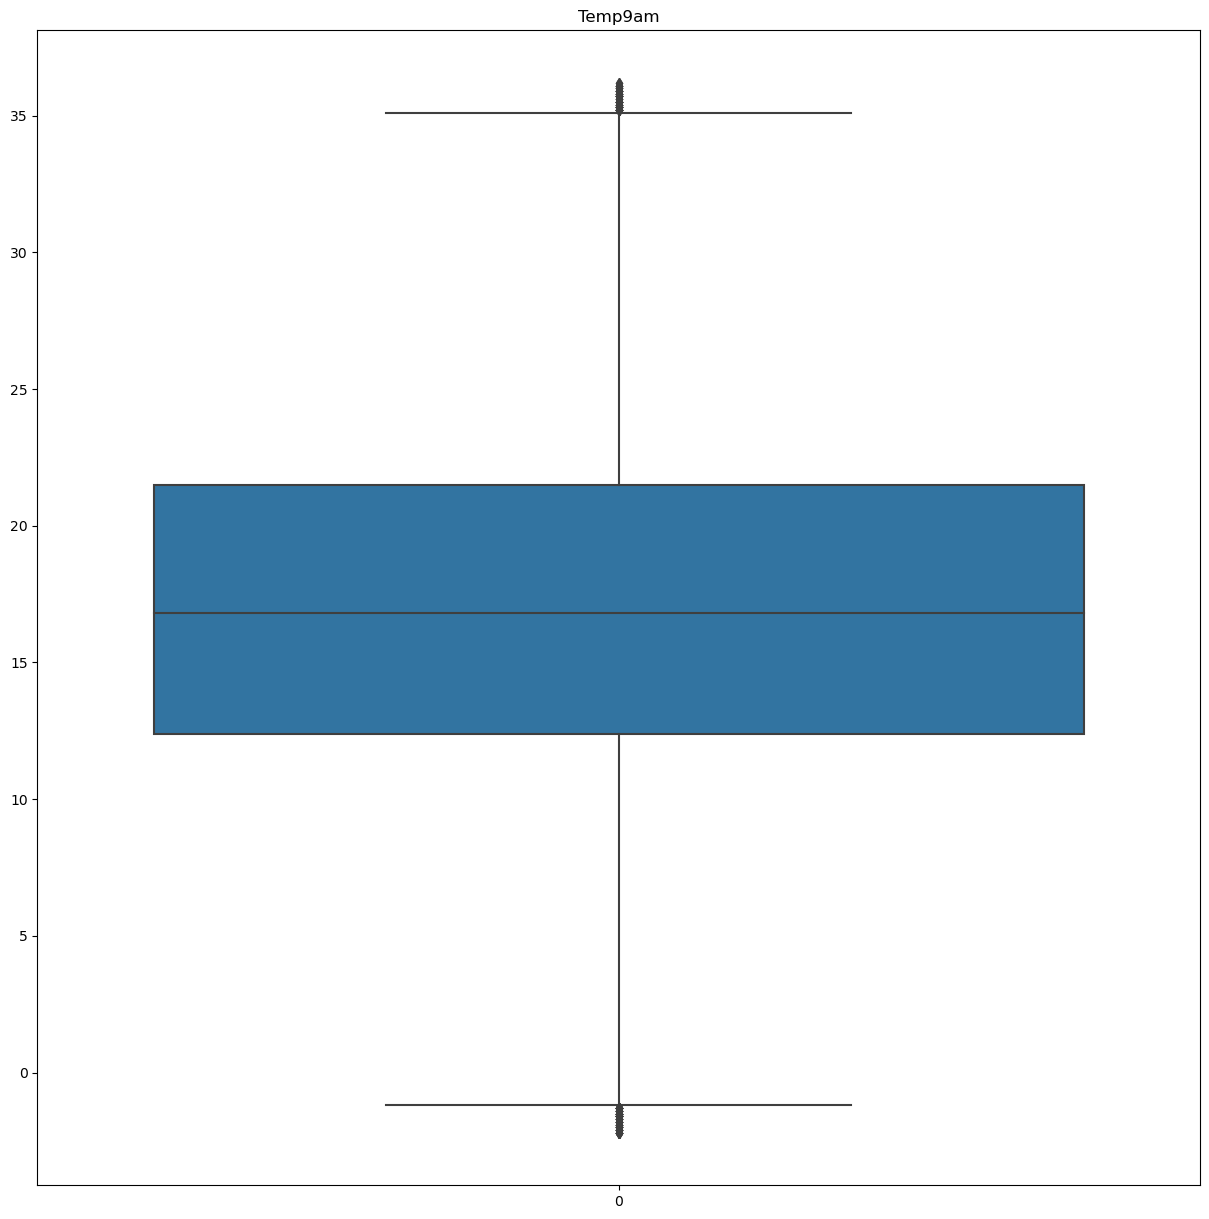

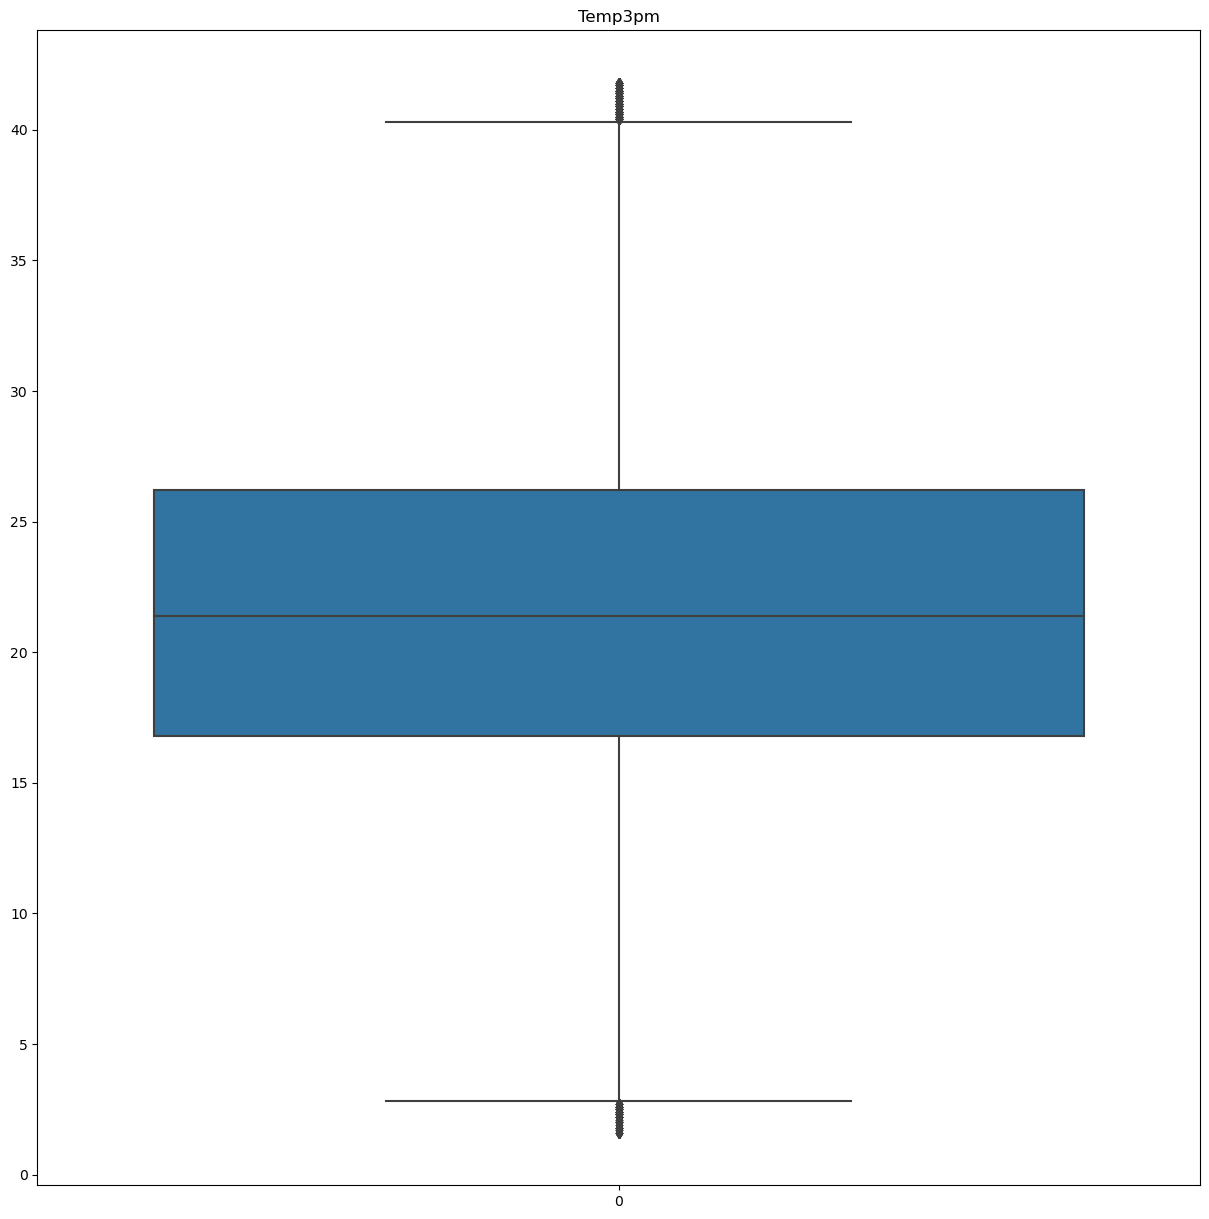

<Figure size 1500x1500 with 0 Axes>

In [95]:
for feature in continuous_feature:
    data=df.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(15,15))

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  int64         
 2   MinTemp        145460 non-null  float64       
 3   MaxTemp        145460 non-null  float64       
 4   Rainfall       145460 non-null  float64       
 5   Evaporation    145460 non-null  float64       
 6   Sunshine       145460 non-null  float64       
 7   WindGustDir    145460 non-null  float64       
 8   WindGustSpeed  145460 non-null  float64       
 9   WindDir9am     145460 non-null  float64       
 10  WindDir3pm     145460 non-null  float64       
 11  WindSpeed9am   145460 non-null  float64       
 12  WindSpeed3pm   145460 non-null  float64       
 13  Humidity9am    145460 non-null  float64       
 14  Humidity3pm    145460 non-null  float64       
 15  

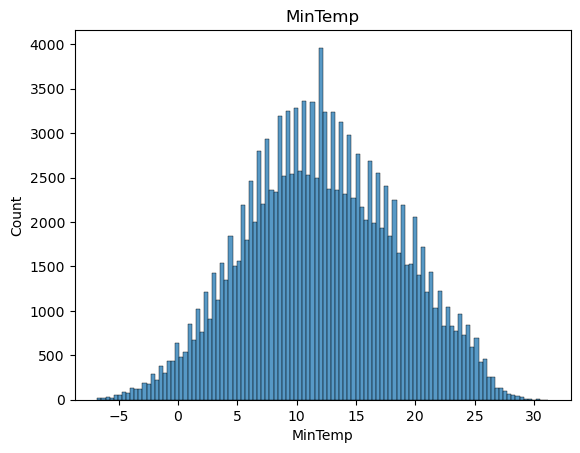

<Figure size 1500x1500 with 0 Axes>

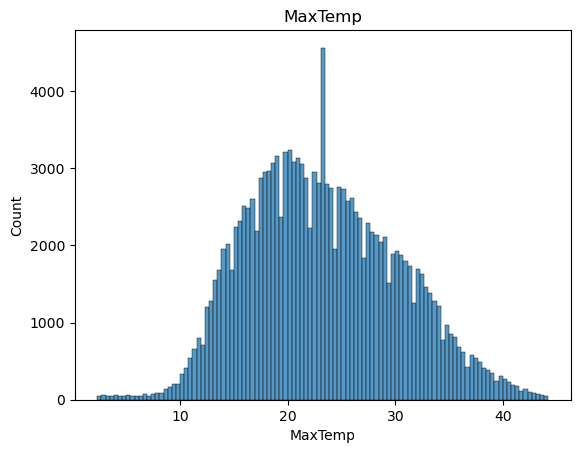

<Figure size 1500x1500 with 0 Axes>

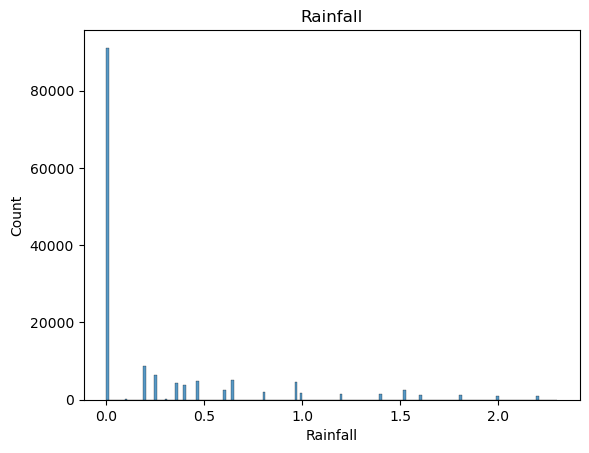

<Figure size 1500x1500 with 0 Axes>

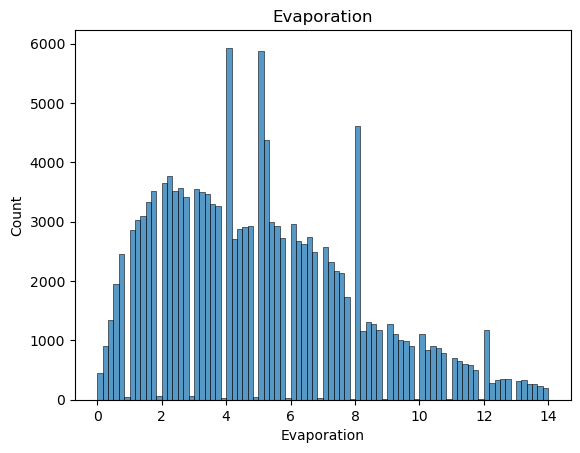

<Figure size 1500x1500 with 0 Axes>

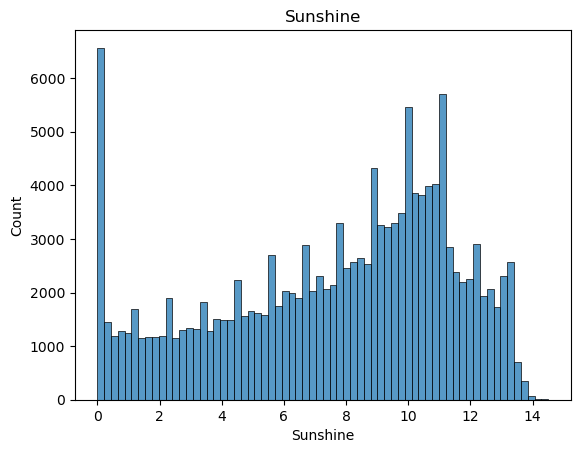

<Figure size 1500x1500 with 0 Axes>

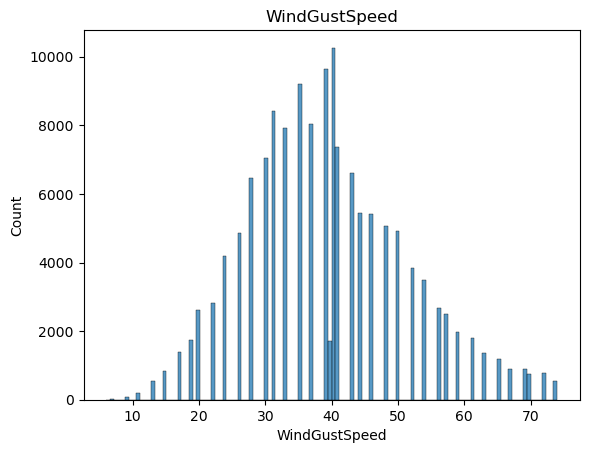

<Figure size 1500x1500 with 0 Axes>

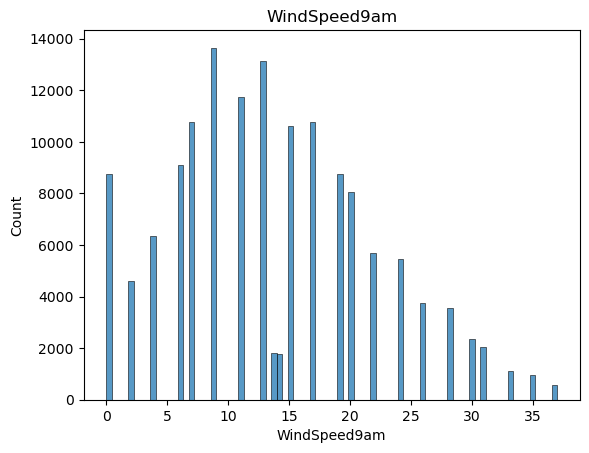

<Figure size 1500x1500 with 0 Axes>

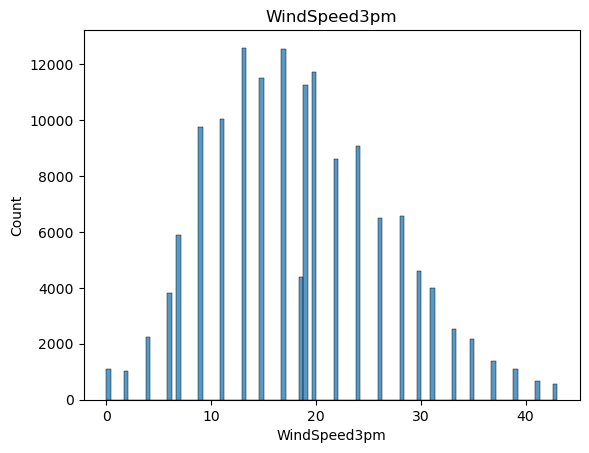

<Figure size 1500x1500 with 0 Axes>

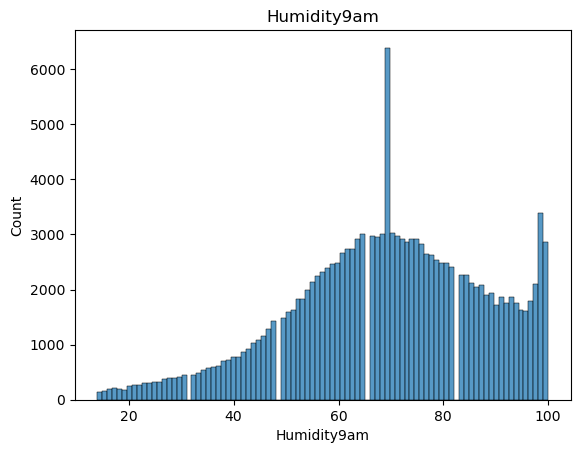

<Figure size 1500x1500 with 0 Axes>

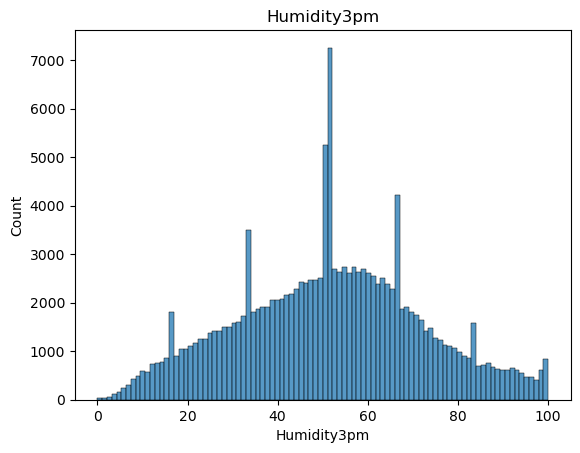

<Figure size 1500x1500 with 0 Axes>

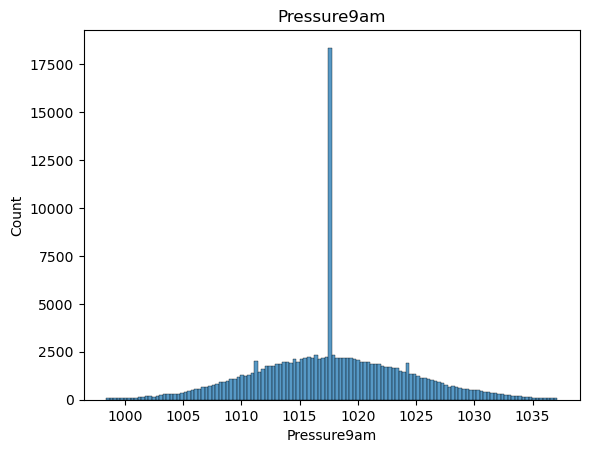

<Figure size 1500x1500 with 0 Axes>

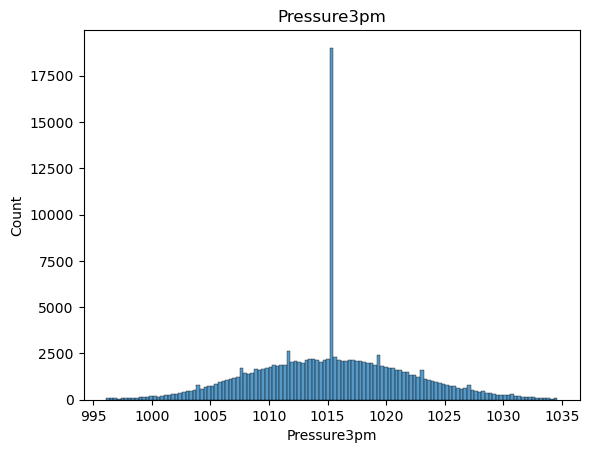

<Figure size 1500x1500 with 0 Axes>

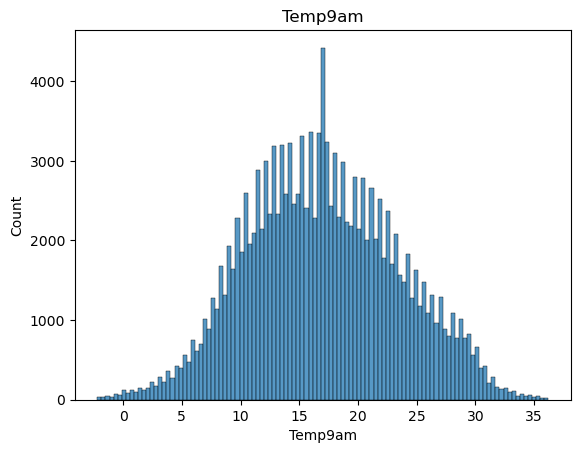

<Figure size 1500x1500 with 0 Axes>

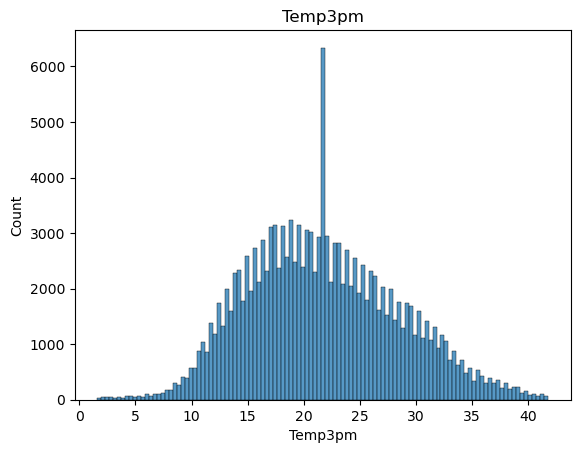

<Figure size 1500x1500 with 0 Axes>

In [97]:
for feature in continuous_feature:
    data=df.copy()
    sns.histplot(df[feature])
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.figure(figsize=(15,15))
    plt.show()

MinTemp


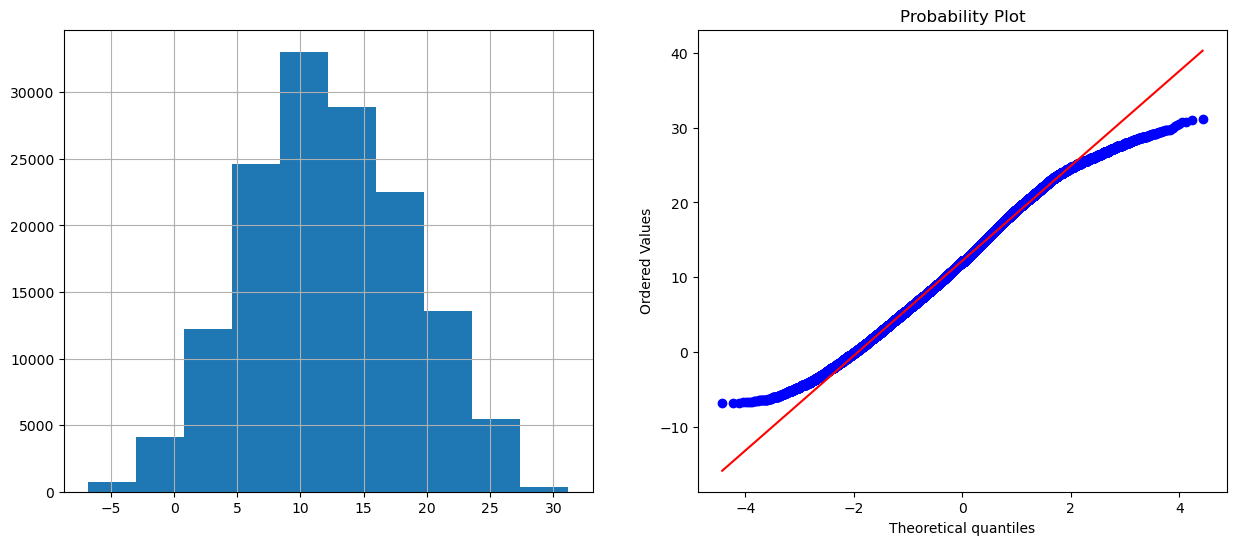

MaxTemp


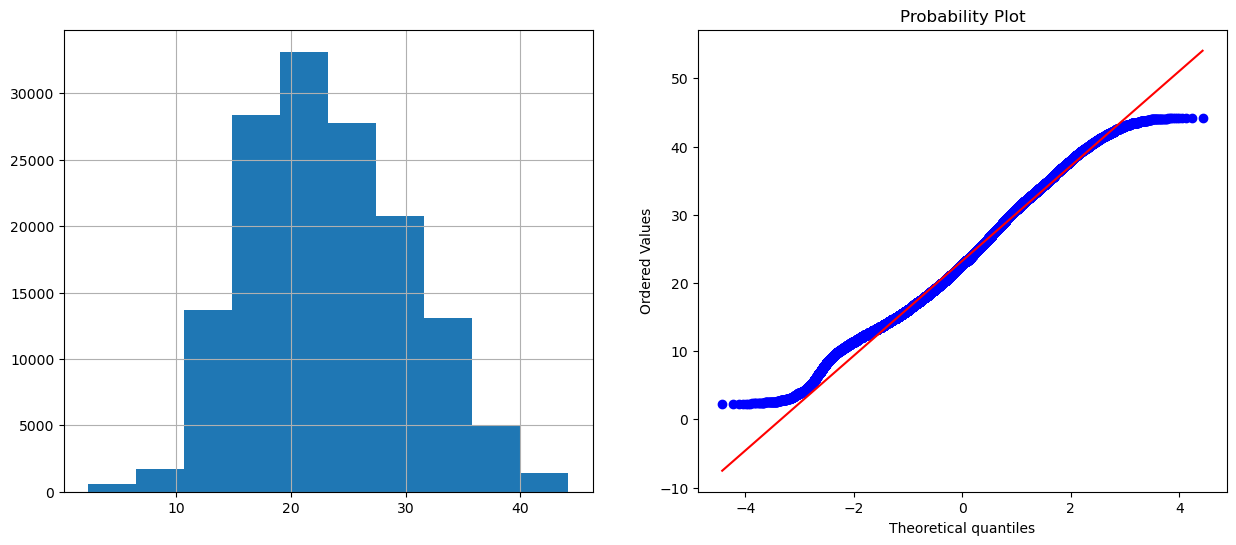

Rainfall


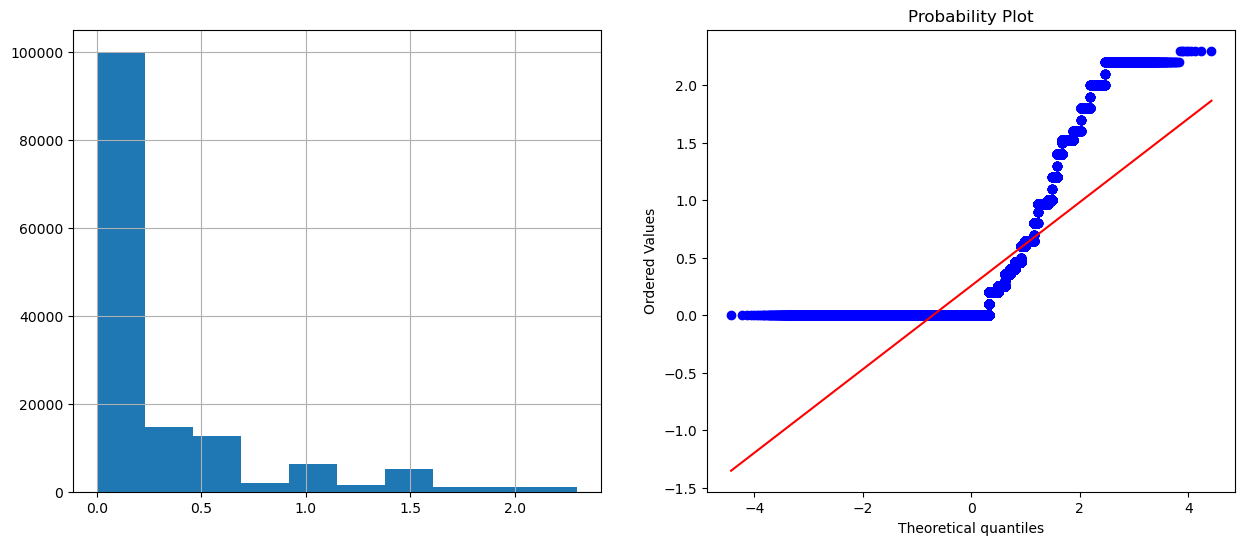

Evaporation


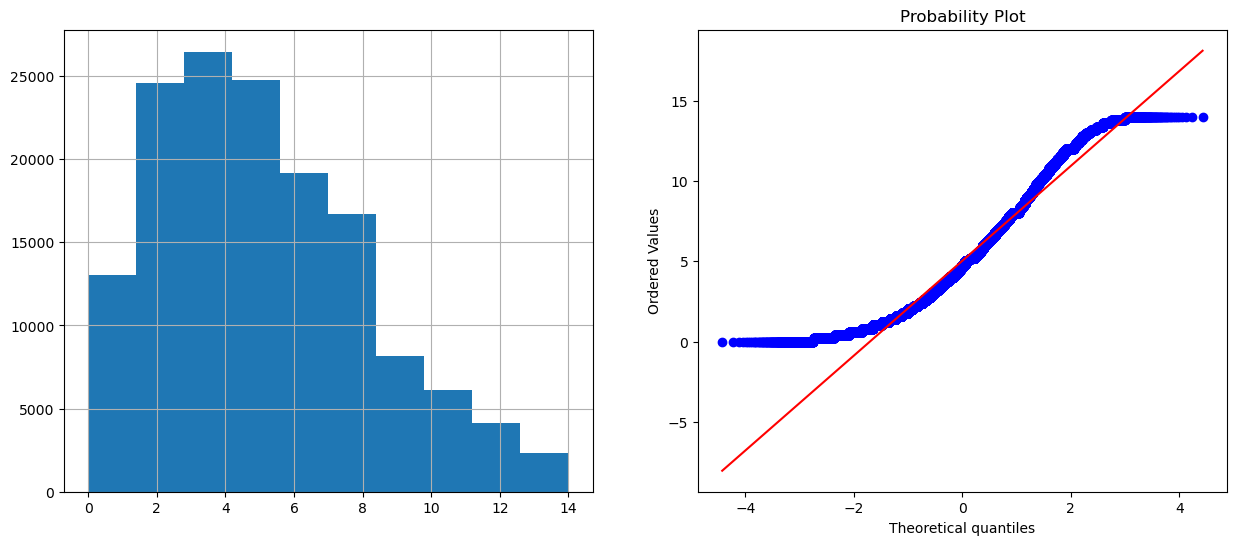

Sunshine


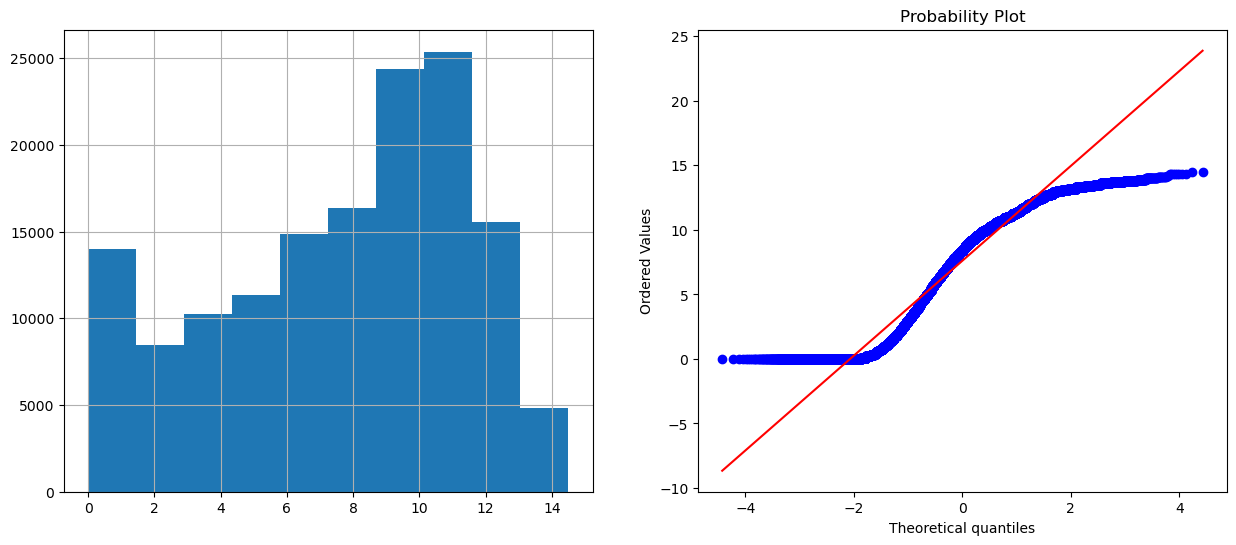

WindGustSpeed


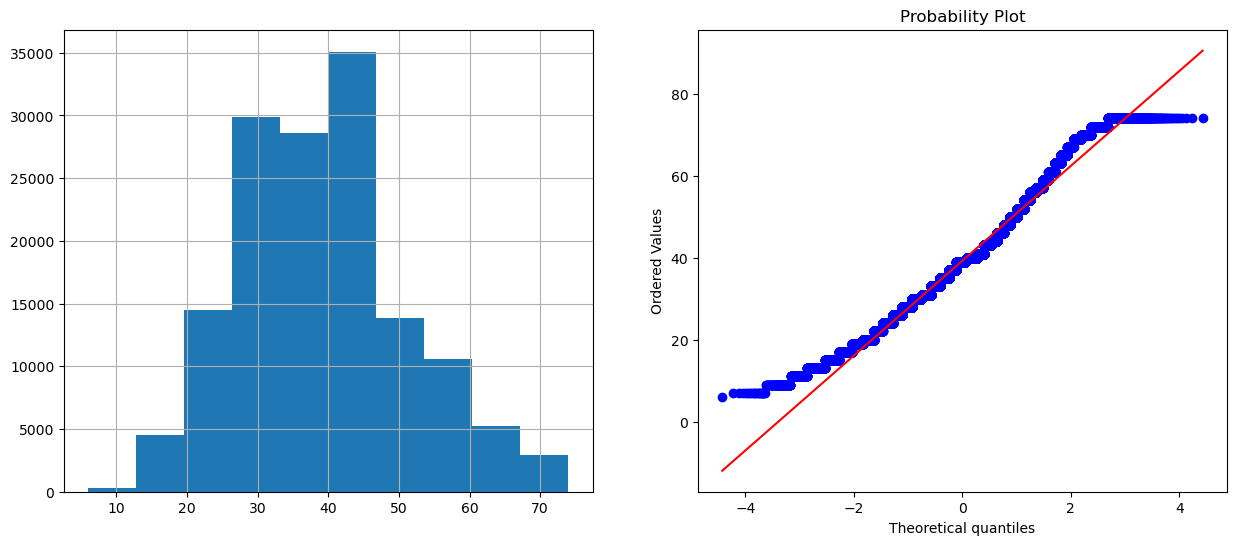

WindSpeed9am


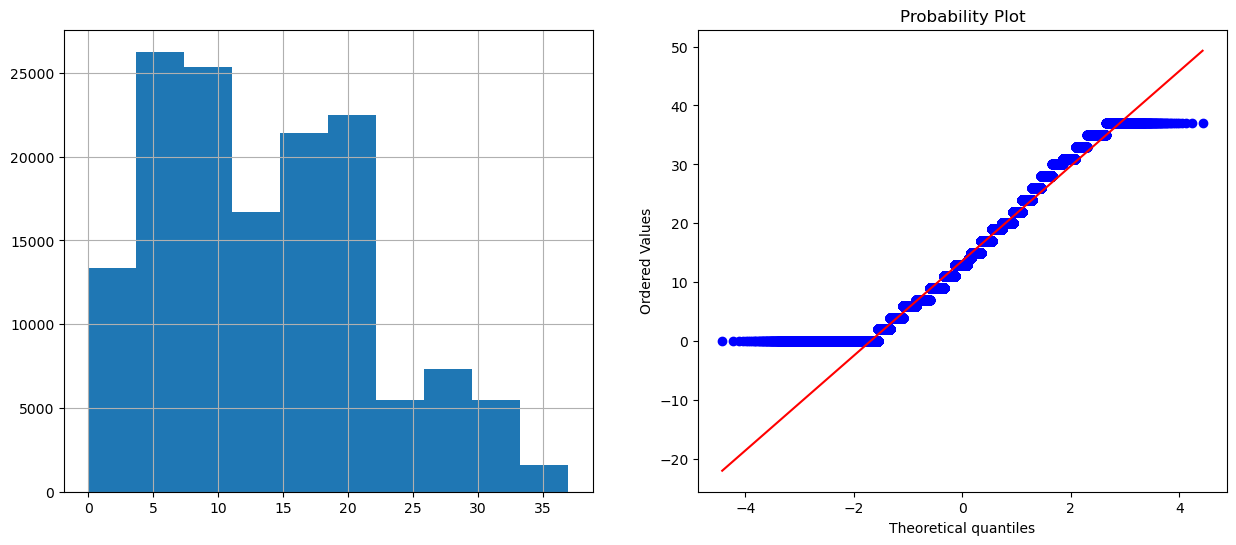

WindSpeed3pm


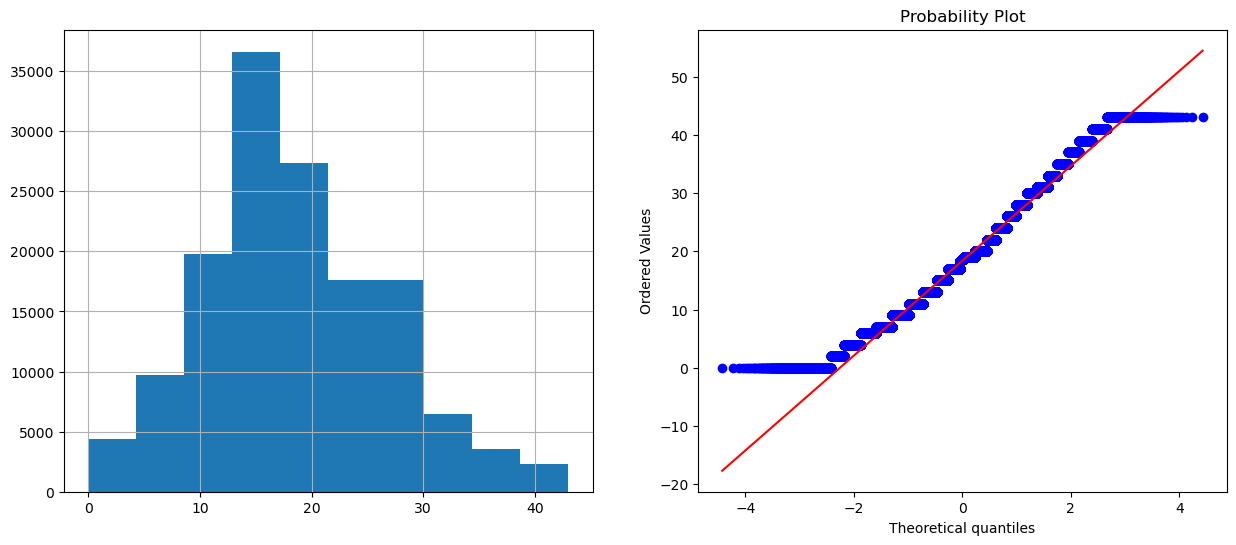

Humidity9am


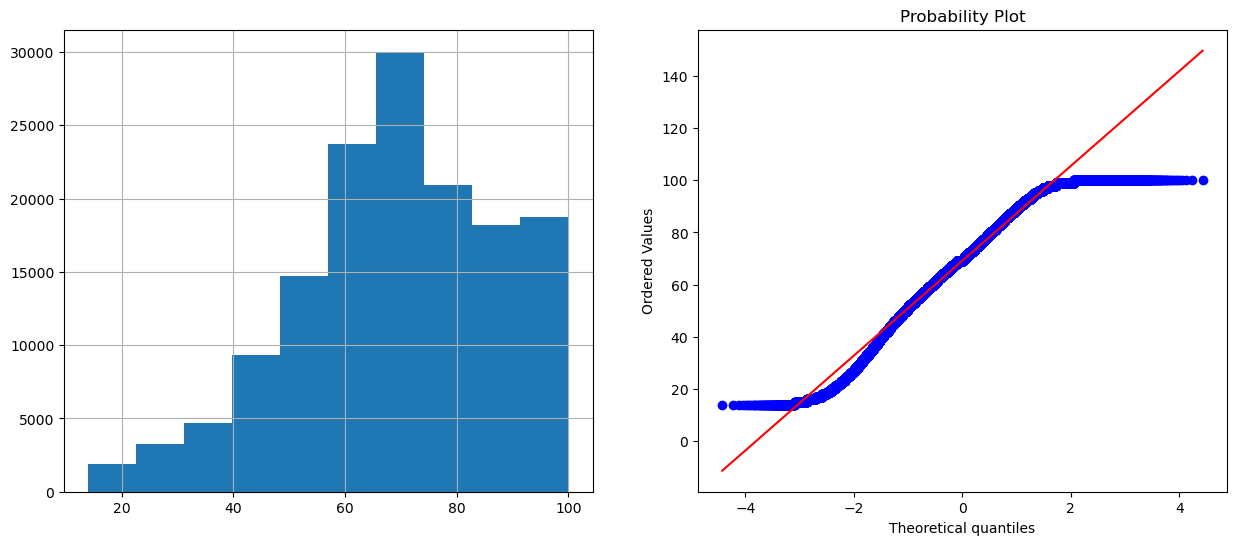

Humidity3pm


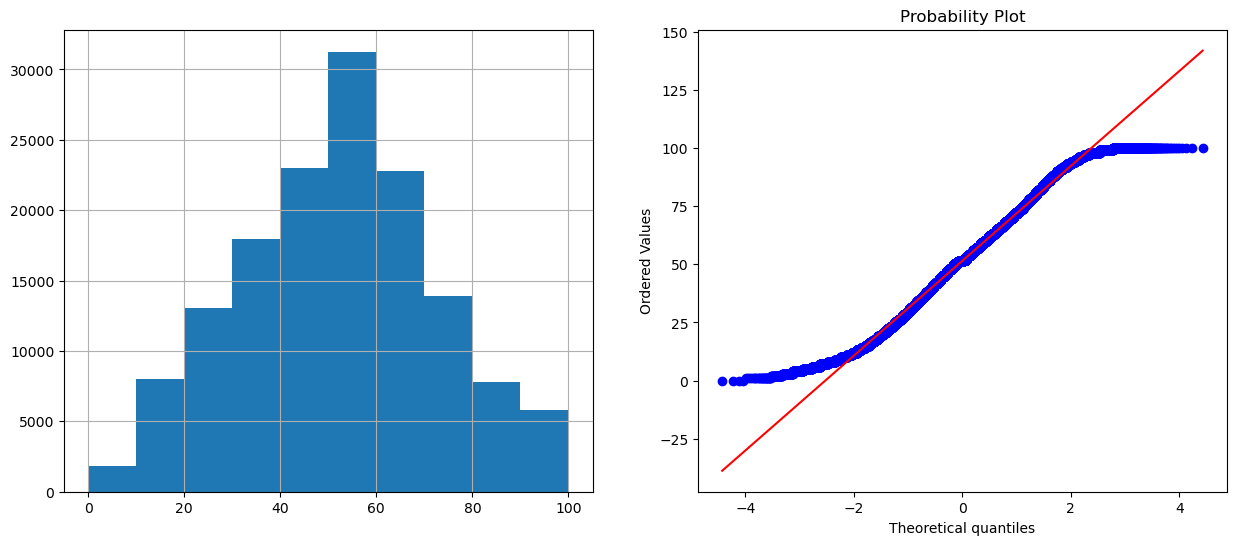

Pressure9am


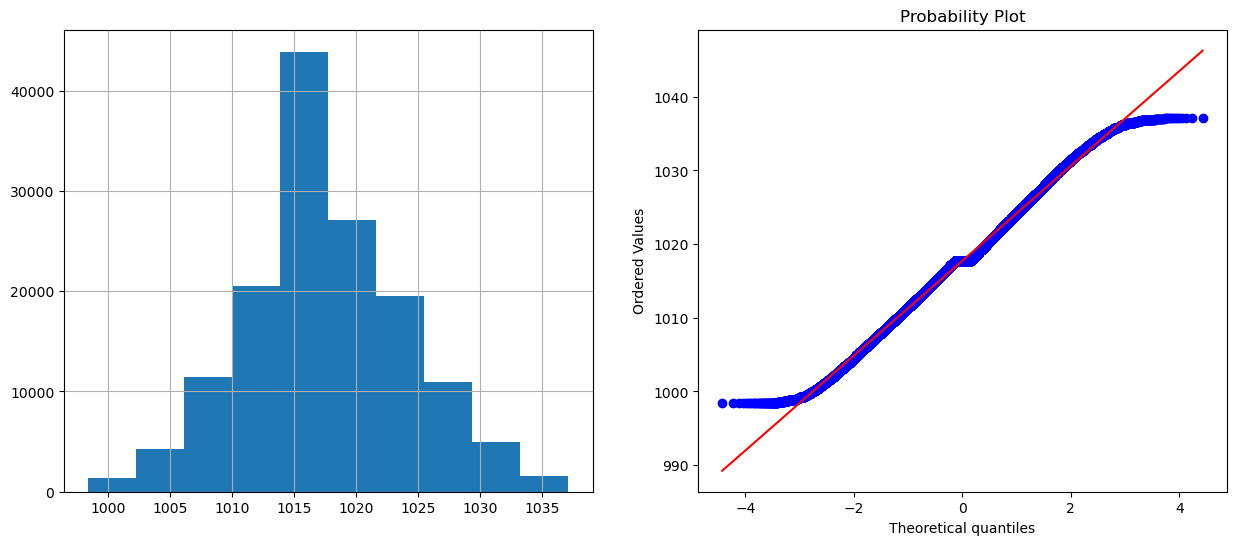

Pressure3pm


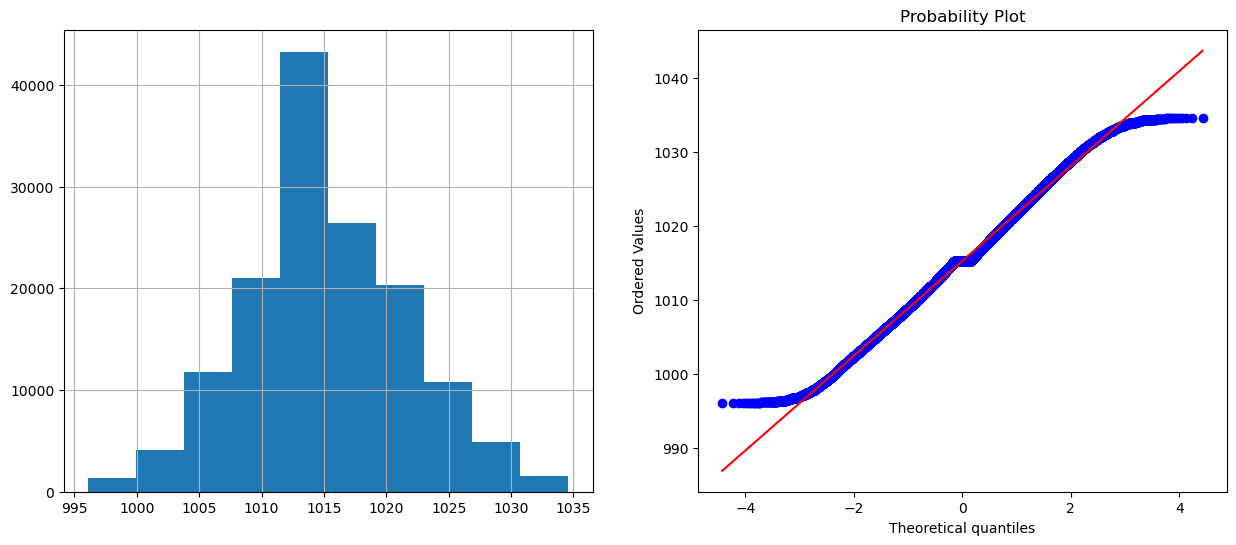

Temp9am


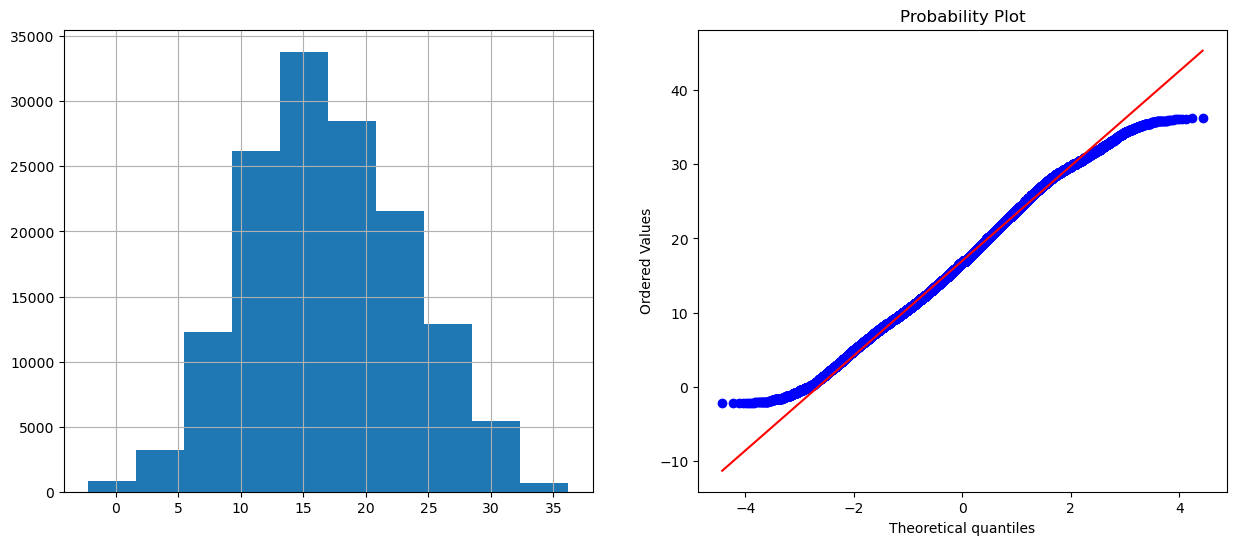

Temp3pm


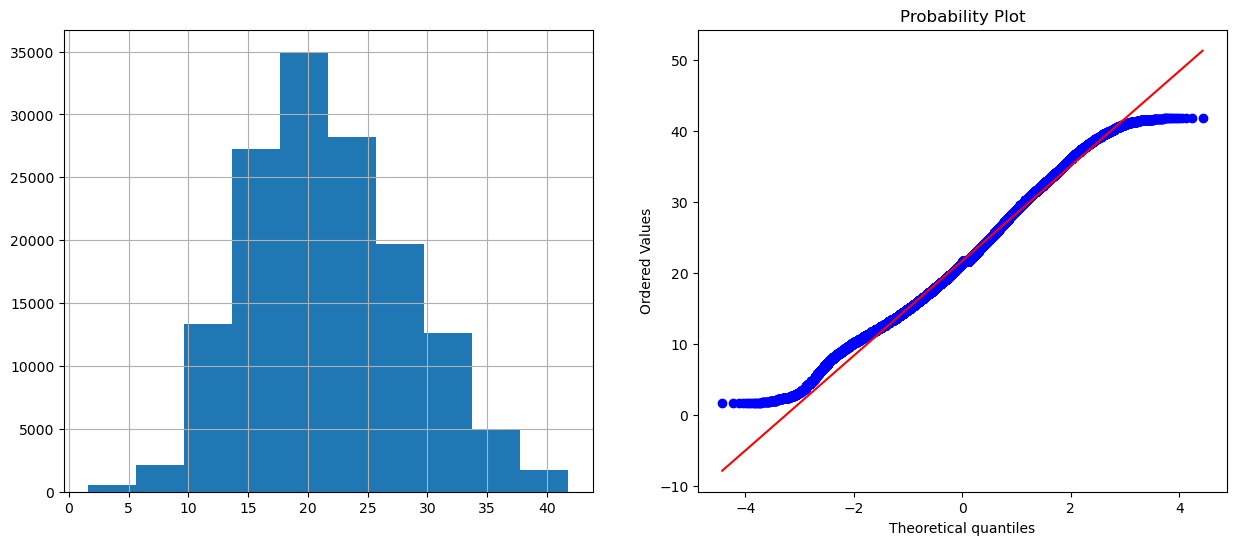

In [98]:
# making qq plots to check the normality of the features
for feature in continuous_feature :
    print(feature)
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[feature].hist()
    plt.subplot(1, 2, 2)
    stats.probplot(df[feature], dist="norm", plot=plt)
    plt.show()

In [99]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Date_month,Date_day
0,2008-12-01,30,13.4,22.900000,0.6,2.400000,8.3,4.0,44.00000,5.0,...,1007.7,1007.1,8.0,0.0,16.9,21.8,0,0,12,1
1,2008-12-02,30,7.4,25.100000,0.0,3.600000,10.0,2.0,44.00000,0.0,...,1010.6,1007.8,7.0,1.0,17.2,24.3,0,0,12,2
2,2008-12-03,30,12.9,25.700000,0.0,2.600000,4.4,5.0,46.00000,5.0,...,1007.6,1008.7,8.0,2.0,21.0,23.2,0,0,12,3
3,2008-12-04,30,9.2,28.000000,0.0,5.234397,8.9,11.0,24.00000,13.0,...,1017.6,1012.8,0.0,5.0,18.1,26.5,0,0,12,4
4,2008-12-05,30,17.5,32.300000,1.0,5.400000,3.0,4.0,41.00000,12.0,...,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,49,2.8,23.400000,0.0,1.400000,7.8,15.0,31.00000,13.0,...,1024.6,1020.3,1.0,1.0,10.1,22.4,0,0,6,21
145456,2017-06-22,49,3.6,25.300000,0.0,7.600000,13.5,0.0,22.00000,13.0,...,1023.5,1019.1,8.0,5.0,10.9,24.5,0,0,6,22
145457,2017-06-23,49,5.4,26.900000,0.0,6.800000,11.0,3.0,37.00000,13.0,...,1021.0,1016.8,8.0,1.0,12.5,26.1,0,0,6,23
145458,2017-06-24,49,7.8,27.000000,0.0,2.600000,13.2,12.0,28.00000,11.0,...,1019.4,1016.5,3.0,2.0,15.1,26.0,0,0,6,24


In [41]:
# df.to_csv("preprocessed_1.csv", index=False)

# data splitting

In [108]:
X = df.drop(["RainTomorrow", "Date"], axis=1)
Y = pd.DataFrame(df["RainTomorrow"], columns= ["RainTomorrow"])

In [110]:
# scaling the x and y 
scaler = RobustScaler()
X = scaler.fit_transform(X)

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size =0.2, stratify = Y, random_state = 0)

<Axes: xlabel='RainTomorrow', ylabel='Count'>

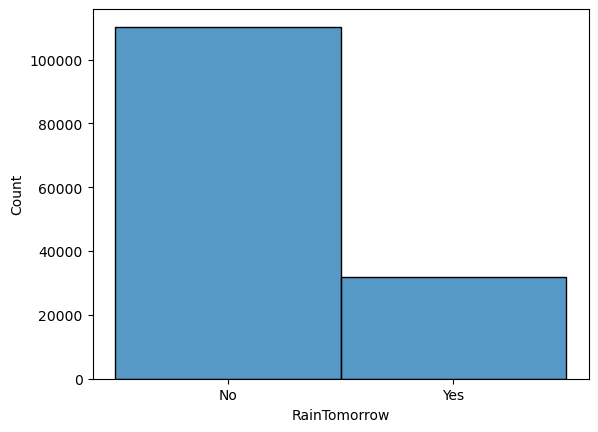

In [45]:
sns.histplot(total_count)

In [53]:
# resampling the imbalanced dataset
sm=SMOTE(random_state=0)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_res)))

The number of classes before fit Counter({0: 90866, 1: 25502})
The number of classes after fit Counter({0: 90866, 1: 90866})


# Compare different models (with random_search hyperparameter tuning)

### catboost

In [57]:
catboost_model = CatBoostClassifier()

param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'depth': [4, 6, 8],
    'iterations': [100, 200, 300]
}

random_search = RandomizedSearchCV(
    estimator=catboost_model,
    param_distributions=param_grid,
    cv=3,
    n_iter=10,
    scoring='accuracy',
    random_state=42
)

In [58]:
random_search.fit(X_train_res, y_train_res)

0:	learn: 0.6927303	total: 203ms	remaining: 1m
1:	learn: 0.6923162	total: 240ms	remaining: 35.8s
2:	learn: 0.6919182	total: 266ms	remaining: 26.3s
3:	learn: 0.6914993	total: 300ms	remaining: 22.2s
4:	learn: 0.6911005	total: 335ms	remaining: 19.8s
5:	learn: 0.6906940	total: 391ms	remaining: 19.2s
6:	learn: 0.6902777	total: 433ms	remaining: 18.1s
7:	learn: 0.6898517	total: 489ms	remaining: 17.8s
8:	learn: 0.6894569	total: 530ms	remaining: 17.1s
9:	learn: 0.6890562	total: 566ms	remaining: 16.4s
10:	learn: 0.6886570	total: 597ms	remaining: 15.7s
11:	learn: 0.6882581	total: 639ms	remaining: 15.3s
12:	learn: 0.6878505	total: 686ms	remaining: 15.1s
13:	learn: 0.6874450	total: 733ms	remaining: 15s
14:	learn: 0.6870453	total: 777ms	remaining: 14.8s
15:	learn: 0.6866600	total: 812ms	remaining: 14.4s
16:	learn: 0.6862637	total: 848ms	remaining: 14.1s
17:	learn: 0.6858745	total: 900ms	remaining: 14.1s
18:	learn: 0.6854737	total: 948ms	remaining: 14s
19:	learn: 0.6850749	total: 993ms	remaining: 13.

166:	learn: 0.6343476	total: 6.42s	remaining: 5.11s
167:	learn: 0.6340455	total: 6.46s	remaining: 5.08s
168:	learn: 0.6337394	total: 6.49s	remaining: 5.03s
169:	learn: 0.6334563	total: 6.51s	remaining: 4.98s
170:	learn: 0.6331649	total: 6.54s	remaining: 4.94s
171:	learn: 0.6328231	total: 6.58s	remaining: 4.9s
172:	learn: 0.6325307	total: 6.62s	remaining: 4.86s
173:	learn: 0.6322375	total: 6.65s	remaining: 4.82s
174:	learn: 0.6319135	total: 6.68s	remaining: 4.77s
175:	learn: 0.6316297	total: 6.71s	remaining: 4.72s
176:	learn: 0.6313431	total: 6.74s	remaining: 4.68s
177:	learn: 0.6310038	total: 6.77s	remaining: 4.64s
178:	learn: 0.6306746	total: 6.81s	remaining: 4.6s
179:	learn: 0.6303959	total: 6.85s	remaining: 4.56s
180:	learn: 0.6300677	total: 6.88s	remaining: 4.52s
181:	learn: 0.6297687	total: 6.91s	remaining: 4.48s
182:	learn: 0.6294897	total: 6.93s	remaining: 4.43s
183:	learn: 0.6291879	total: 6.97s	remaining: 4.39s
184:	learn: 0.6289107	total: 7s	remaining: 4.35s
185:	learn: 0.628

32:	learn: 0.6814323	total: 912ms	remaining: 7.38s
33:	learn: 0.6810931	total: 942ms	remaining: 7.37s
34:	learn: 0.6807557	total: 971ms	remaining: 7.35s
35:	learn: 0.6804084	total: 1s	remaining: 7.34s
36:	learn: 0.6800587	total: 1.03s	remaining: 7.32s
37:	learn: 0.6797175	total: 1.06s	remaining: 7.29s
38:	learn: 0.6793722	total: 1.09s	remaining: 7.28s
39:	learn: 0.6790422	total: 1.12s	remaining: 7.27s
40:	learn: 0.6786873	total: 1.15s	remaining: 7.25s
41:	learn: 0.6783522	total: 1.18s	remaining: 7.22s
42:	learn: 0.6780072	total: 1.2s	remaining: 7.17s
43:	learn: 0.6776610	total: 1.23s	remaining: 7.14s
44:	learn: 0.6773339	total: 1.25s	remaining: 7.1s
45:	learn: 0.6769957	total: 1.28s	remaining: 7.06s
46:	learn: 0.6766628	total: 1.3s	remaining: 7.03s
47:	learn: 0.6763424	total: 1.34s	remaining: 7.02s
48:	learn: 0.6760005	total: 1.36s	remaining: 6.99s
49:	learn: 0.6756646	total: 1.39s	remaining: 6.96s
50:	learn: 0.6753256	total: 1.42s	remaining: 6.93s
51:	learn: 0.6750000	total: 1.44s	rem

198:	learn: 0.6327025	total: 5.52s	remaining: 2.8s
199:	learn: 0.6324594	total: 5.55s	remaining: 2.78s
200:	learn: 0.6322106	total: 5.58s	remaining: 2.75s
201:	learn: 0.6319628	total: 5.61s	remaining: 2.72s
202:	learn: 0.6317231	total: 5.63s	remaining: 2.69s
203:	learn: 0.6314851	total: 5.66s	remaining: 2.66s
204:	learn: 0.6312397	total: 5.68s	remaining: 2.63s
205:	learn: 0.6309903	total: 5.71s	remaining: 2.6s
206:	learn: 0.6307432	total: 5.74s	remaining: 2.58s
207:	learn: 0.6305001	total: 5.77s	remaining: 2.55s
208:	learn: 0.6302574	total: 5.79s	remaining: 2.52s
209:	learn: 0.6300071	total: 5.84s	remaining: 2.5s
210:	learn: 0.6297753	total: 5.86s	remaining: 2.47s
211:	learn: 0.6295283	total: 5.89s	remaining: 2.44s
212:	learn: 0.6292767	total: 5.91s	remaining: 2.42s
213:	learn: 0.6290299	total: 5.94s	remaining: 2.39s
214:	learn: 0.6287929	total: 5.97s	remaining: 2.36s
215:	learn: 0.6285394	total: 6s	remaining: 2.33s
216:	learn: 0.6282903	total: 6.03s	remaining: 2.3s
217:	learn: 0.62803

58:	learn: 0.6729949	total: 2.37s	remaining: 9.66s
59:	learn: 0.6726696	total: 2.41s	remaining: 9.65s
60:	learn: 0.6723402	total: 2.45s	remaining: 9.61s
61:	learn: 0.6720290	total: 2.49s	remaining: 9.55s
62:	learn: 0.6716992	total: 2.53s	remaining: 9.52s
63:	learn: 0.6713653	total: 2.57s	remaining: 9.46s
64:	learn: 0.6710421	total: 2.61s	remaining: 9.43s
65:	learn: 0.6707347	total: 2.65s	remaining: 9.39s
66:	learn: 0.6704208	total: 2.68s	remaining: 9.33s
67:	learn: 0.6701162	total: 2.72s	remaining: 9.28s
68:	learn: 0.6697851	total: 2.76s	remaining: 9.23s
69:	learn: 0.6694561	total: 2.79s	remaining: 9.18s
70:	learn: 0.6691506	total: 2.83s	remaining: 9.14s
71:	learn: 0.6688406	total: 2.88s	remaining: 9.12s
72:	learn: 0.6685189	total: 2.92s	remaining: 9.07s
73:	learn: 0.6681912	total: 2.95s	remaining: 9.01s
74:	learn: 0.6678561	total: 2.99s	remaining: 8.97s
75:	learn: 0.6675398	total: 3.03s	remaining: 8.93s
76:	learn: 0.6672169	total: 3.08s	remaining: 8.91s
77:	learn: 0.6669098	total: 3.1

219:	learn: 0.6279599	total: 7.88s	remaining: 2.87s
220:	learn: 0.6277112	total: 7.92s	remaining: 2.83s
221:	learn: 0.6274709	total: 7.95s	remaining: 2.79s
222:	learn: 0.6272302	total: 7.98s	remaining: 2.75s
223:	learn: 0.6269973	total: 8.01s	remaining: 2.72s
224:	learn: 0.6267595	total: 8.04s	remaining: 2.68s
225:	learn: 0.6265107	total: 8.07s	remaining: 2.64s
226:	learn: 0.6262731	total: 8.11s	remaining: 2.61s
227:	learn: 0.6260355	total: 8.14s	remaining: 2.57s
228:	learn: 0.6258062	total: 8.17s	remaining: 2.53s
229:	learn: 0.6255733	total: 8.21s	remaining: 2.5s
230:	learn: 0.6253450	total: 8.24s	remaining: 2.46s
231:	learn: 0.6250979	total: 8.27s	remaining: 2.42s
232:	learn: 0.6248535	total: 8.3s	remaining: 2.39s
233:	learn: 0.6246176	total: 8.33s	remaining: 2.35s
234:	learn: 0.6243836	total: 8.36s	remaining: 2.31s
235:	learn: 0.6241503	total: 8.39s	remaining: 2.27s
236:	learn: 0.6239064	total: 8.41s	remaining: 2.24s
237:	learn: 0.6236726	total: 8.44s	remaining: 2.2s
238:	learn: 0.6

KeyboardInterrupt: 

In [48]:
random_search.best_params_

{'learning_rate': 0.01, 'iterations': 300, 'depth': 6}

In [51]:
y_pred = random_search.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[20075  2642]
 [ 2435  3940]]
0.8254846693249003
              precision    recall  f1-score   support

           0       0.89      0.88      0.89     22717
           1       0.60      0.62      0.61      6375

    accuracy                           0.83     29092
   macro avg       0.75      0.75      0.75     29092
weighted avg       0.83      0.83      0.83     29092



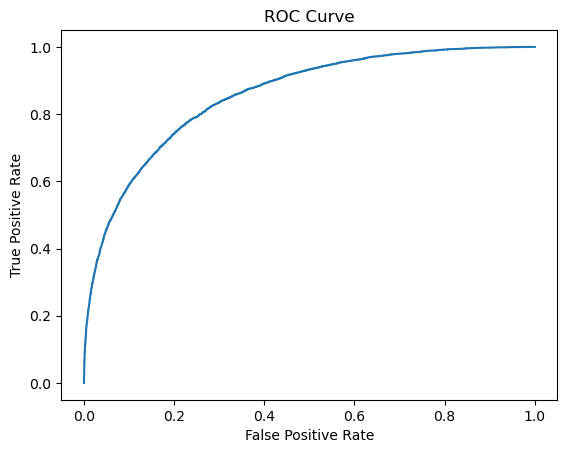

ROC AUC Score: 0.8561969916284513


In [48]:
y_pred_proba = random_search.predict_proba(X_test)[:, 1]  # Assuming binary classification

# Calculate the false positive rate (FPR), true positive rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plot the ROC curve
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC AUC Score:", roc_auc)

### random forest

In [ ]:
randomforest_model = RandomForestClassifier()

param_grid1 = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

random_search_rf = RandomizedSearchCV(
    estimator=randomforest_model,
    param_distributions=param_grid1,
    cv=3,
    n_iter=10,
    scoring='accuracy',
    random_state=42
)

In [ ]:
random_search_rf.fit(X_train_res, y_train_res)

In [52]:
random_search_rf.best_params_

{'n_estimators': 200,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': None,
 'bootstrap': False}

In [53]:
y_pred1 = random_search_rf.predict(X_test)
print(confusion_matrix(y_test,y_pred1))
print(accuracy_score(y_test,y_pred1))
print(classification_report(y_test,y_pred1))

[[20828  1889]
 [ 2515  3860]]
0.8486181768183693
              precision    recall  f1-score   support

           0       0.89      0.92      0.90     22717
           1       0.67      0.61      0.64      6375

    accuracy                           0.85     29092
   macro avg       0.78      0.76      0.77     29092
weighted avg       0.84      0.85      0.85     29092



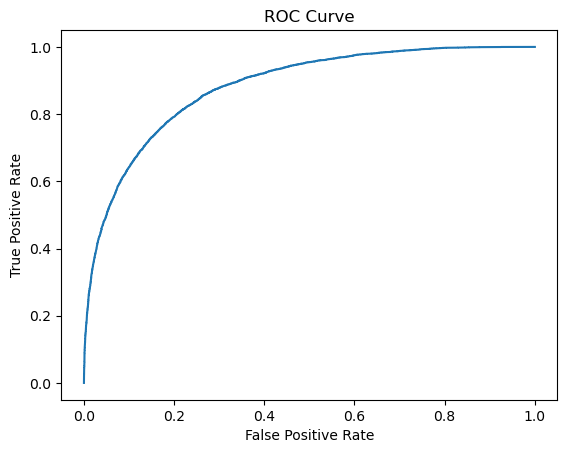

ROC AUC Score: 0.8811859754334449


In [54]:
y_pred_proba1 = random_search_rf.predict_proba(X_test)[:, 1]  

# Calculate the false positive rate (FPR), true positive rate (TPR), and thresholds
fpr1, tpr1, thresholds1 = roc_curve(y_test, y_pred_proba1)

# Plot the ROC curve
plt.plot(fpr1, tpr1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Calculate the ROC AUC score
roc_auc1 = roc_auc_score(y_test, y_pred_proba1)
print("ROC AUC Score:", roc_auc1)

### logistic 

In [66]:
logistic_model = LogisticRegression()

param_grid2 = {
    'penalty': ['l1', 'l2'],
    'C': [0.1,1.0,7, 10.0], # Inverse of regularization strength,smaller value stronger regularization
    'solver': ['liblinear', 'saga']  # Algorithm to use in the optimization problem. 
}

random_search_log = RandomizedSearchCV(
    estimator=logistic_model,
    param_distributions=param_grid2,
    cv=3,
    n_iter=10,
    scoring='accuracy',
    random_state=42
)

In [67]:
random_search_log.fit(X_train_res, y_train_res)

RandomizedSearchCV(cv=3, estimator=LogisticRegression(),
                   param_distributions={'C': [0.1, 1.0, 7, 10.0],
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['liblinear', 'saga']},
                   random_state=42, scoring='accuracy')

In [68]:
random_search_log.best_params_

{'solver': 'saga', 'penalty': 'l2', 'C': 7}

In [75]:
y_pred2 = random_search_log.predict(X_test)
print(confusion_matrix(y_test,y_pred2))
print(accuracy_score(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

[[17819  4898]
 [ 1549  4826]]
0.7783926852743022
              precision    recall  f1-score   support

           0       0.92      0.78      0.85     22717
           1       0.50      0.76      0.60      6375

    accuracy                           0.78     29092
   macro avg       0.71      0.77      0.72     29092
weighted avg       0.83      0.78      0.79     29092



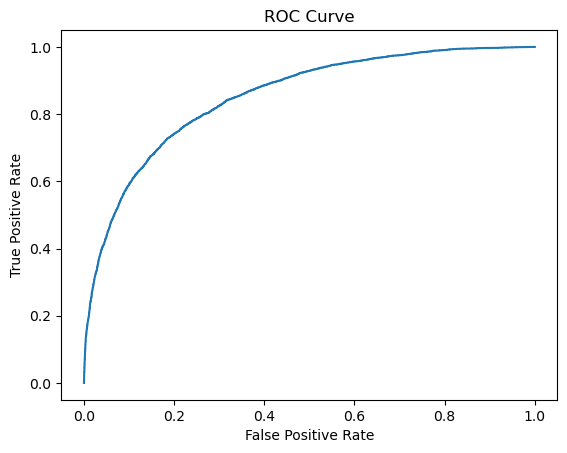

ROC AUC Score: 0.8521341968138225


In [76]:
y_pred_proba2 = random_search_log.predict_proba(X_test)[:, 1]  

# Calculate the false positive rate (FPR), true positive rate (TPR), and thresholds
fpr2, tpr2, thresholds2 = roc_curve(y_test, y_pred_proba2)

# Plot the ROC curve
plt.plot(fpr2, tpr2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Calculate the ROC AUC score
roc_auc2 = roc_auc_score(y_test, y_pred_proba2)
print("ROC AUC Score:", roc_auc2)

In [100]:
# running gridsearch on the best parameters 
# after training near on 5,6,7,8 the best i got is 6 and then traning again 
# trained on [5.6,5.8,6.,6.4] got 5.6 again
# [5,5.4,5.5,5.6,5.7] got 5.4
# [5.25,5.3,5.35,5.4,5.45] got 5.25
# [5.05,5.10,5.15,5.2,5.23,5.25, 5.27] got 5.1
# 



logistic_model = LogisticRegression()

param_grid_2 = {
    'solver': ['liblinear'],
    'penalty': ['l2'],
    'C': [5.07,5.08,5.09,5.1,5.11,5.12]
}
grid_search_log = GridSearchCV(logistic_model, param_grid_2, cv=5, n_jobs=-1)

In [101]:
grid_search_log.fit(X_train_res, y_train_res)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [5.07, 5.08, 5.09, 5.1, 5.11, 5.12],
                         'penalty': ['l2'], 'solver': ['liblinear']})

In [105]:
grid_search_log.best_params_

{'C': 5.08, 'penalty': 'l2', 'solver': 'liblinear'}

In [106]:
y_pred_2 = grid_search_log.predict(X_test)
print(confusion_matrix(y_test,y_pred_2))
print(accuracy_score(y_test,y_pred_2))
print(classification_report(y_test,y_pred_2))

[[17818  4899]
 [ 1550  4825]]
0.7783239378523306
              precision    recall  f1-score   support

           0       0.92      0.78      0.85     22717
           1       0.50      0.76      0.60      6375

    accuracy                           0.78     29092
   macro avg       0.71      0.77      0.72     29092
weighted avg       0.83      0.78      0.79     29092



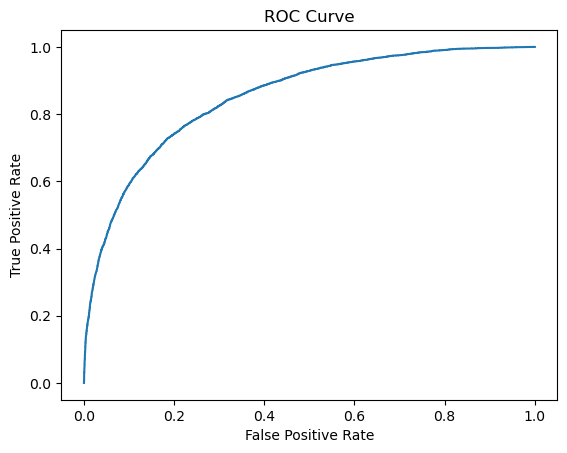

ROC AUC Score: 0.8521374283921431


In [107]:
y_pred_proba_2 = grid_search_log.predict_proba(X_test)[:, 1]  

# Calculate the false positive rate (FPR), true positive rate (TPR), and thresholds
fpr_2, tpr_2, thresholds_2 = roc_curve(y_test, y_pred_proba_2)

# Plot the ROC curve
plt.plot(fpr_2, tpr_2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Calculate the ROC AUC score
roc_auc_2 = roc_auc_score(y_test, y_pred_proba_2)
print("ROC AUC Score:", roc_auc_2)

### Naive Bayes

In [ ]:
naive_bayes_model = GaussianNB()

param_grid3 = {
    'var_smoothing': [1e-9, 1e-8, 1e-7]
}


random_searchNB = RandomizedSearchCV(
    estimator=naive_bayes_model,
    param_distributions=param_grid3,
    cv=3,
    n_iter=10,
    scoring='accuracy',
    random_state=42
)


In [ ]:
random_searchNB.fit(X_train_res, y_train_res)

In [ ]:
y_pred3 = random_searchNB.predict(X_test)
print(confusion_matrix(y_test,y_pred3))
print(accuracy_score(y_test,y_pred3))
print(classification_report(y_test,y_pred3))

In [ ]:
y_pred_proba3 = random_searchNB.predict_proba(X_test)[:, 1]  

# Calculate the false positive rate (FPR), true positive rate (TPR), and thresholds
fpr3, tpr3, thresholds3 = roc_curve(y_test, y_pred_proba3)

# Plot the ROC curve
plt.plot(fpr3, tpr3)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Calculate the ROC AUC score
roc_auc3 = roc_auc_score(y_test, y_pred_proba3)
print("ROC AUC Score:", roc_auc3)

### KNN

In [ ]:
knn_model = KNeighborsClassifier()

param_grid4 = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

random_searchKNN = RandomizedSearchCV(
    estimator=knn_model,
    param_distributions=param_grid4,
    cv=3,
    n_iter=10,
    scoring='accuracy',
    random_state=42
)

In [ ]:
random_searchKNN.fit(X_train_res, y_train_res)

In [ ]:
y_pred4 = random_searchKNN.predict(X_test)
print(confusion_matrix(y_test,y_pred4))
print(accuracy_score(y_test,y_pred4))
print(classification_report(y_test,y_pred4))

In [ ]:
y_pred_proba4 = random_searchKNN.predict_proba(X_test)[:, 1]

# Calculate the false positive rate (FPR), true positive rate (TPR), and thresholds
fpr4, tpr4, thresholds4 = roc_curve(y_test, y_pred_proba4)

# Plot the ROC curve
plt.plot(fpr4, tpr4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Calculate the ROC AUC score
roc_auc4 = roc_auc_score(y_test, y_pred_proba4)
print("ROC AUC Score:", roc_auc4)

### XGBoost

In [61]:
xgb_model = XGBClassifier()

param_grid5 = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

random_searchXG = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid5,
    cv=3,
    n_iter=10,
    scoring='accuracy',
    random_state=42
)

In [62]:
random_searchXG.fit(X_train_res, y_train_res)

KeyboardInterrupt: 

In [ ]:
best_params = random_searchXG.best_params_

In [ ]:
y_pred5 = random_searchXG.predict(X_test)
print(confusion_matrix(y_test,y_pred5))
print(accuracy_score(y_test,y_pred5))
print(classification_report(y_test,y_pred5))

In [ ]:
y_pred_proba5 = random_searchXG.predict_proba(X_test)[:, 1]  

# Calculate the false positive rate (FPR), true positive rate (TPR), and thresholds
fpr5, tpr5, thresholds5 = roc_curve(y_test, y_pred_proba5)

# Plot the ROC curve
plt.plot(fpr5, tpr5)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Calculate the ROC AUC score
roc_auc5 = roc_auc_score(y_test, y_pred_proba5)
print("ROC AUC Score:", roc_auc5)

### Adaboost

In [ ]:
adaboost_model = AdaBoostClassifier()

param_grid7 = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.01, 0.001],
    'algorithm': ['SAMME', 'SAMME.R']
}

random_search_adaboost = RandomizedSearchCV(
    estimator=adaboost_model,
    param_distributions=param_grid7,
    cv=3,
    n_iter=10,
    scoring='accuracy',
    random_state=42
)

In [ ]:
random_search_adaboost.fit(X_train_res, y_train_res)

In [ ]:
best_params = random_search_adaboost.best_params_

In [ ]:
y_pred7 = random_search_adaboost.predict(X_test)
print(confusion_matrix(y_test,y_pred7))
print(accuracy_score(y_test,y_pred7))
print(classification_report(y_test,y_pred7))

In [ ]:
y_pred_proba7 = random_search_adaboost.predict_proba(X_test)[:, 1]  

# Calculate the false positive rate (FPR), true positive rate (TPR), and thresholds
fpr7, tpr7, thresholds7 = roc_curve(y_test, y_pred_proba7)

# Plot the ROC curve
plt.plot(fpr7, tpr7)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Calculate the ROC AUC score
roc_auc7 = roc_auc_score(y_test, y_pred_proba7)
print("ROC AUC Score:", roc_auc7)

### bagging 

In [49]:
bagging_clf = BaggingClassifier()
param_grid8 = {
    'n_estimators': [10, 50, 100, 200],
    'max_samples': [0.5, 0.7, 0.9, 1.0],
    'max_features': [0.5, 0.7, 0.9, 1.0],
}

# Step 4: Create the RandomizedSearchCV instance
random_search_bagging = RandomizedSearchCV(bagging_clf, param_distributions=param_grid8, n_iter=10, cv=5)

In [50]:
# Step 5: Fit the RandomizedSearchCV instance on your data
random_search_bagging.fit(X_train_res, y_train_res)

RandomizedSearchCV(cv=5, estimator=BaggingClassifier(),
                   param_distributions={'max_features': [0.5, 0.7, 0.9, 1.0],
                                        'max_samples': [0.5, 0.7, 0.9, 1.0],
                                        'n_estimators': [10, 50, 100, 200]})

In [51]:
# Step 6: Check the best hyperparameters and the best score
print("Best Hyperparameters:", random_search_bagging.best_params_)
print("Best Score:", random_search_bagging.best_score_)


Best Hyperparameters: {'n_estimators': 200, 'max_samples': 1.0, 'max_features': 0.5}
Best Score: 0.89724534011178


In [ ]:
y_pred8 = random_search_bagging.predict(X_test)
print(confusion_matrix(y_test,y_pred8))
print(accuracy_score(y_test,y_pred8))
print(classification_report(y_test,y_pred8))

In [ ]:
y_pred_proba8 = random_search_bagging.predict_proba(X_test)[:, 1]  

# Calculate the false positive rate (FPR), true positive rate (TPR), and thresholds
fpr8, tpr8, thresholds8 = roc_curve(y_test, y_pred_proba8)

# Plot the ROC curve
plt.plot(fpr8, tpr8)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Calculate the ROC AUC score
roc_auc8 = roc_auc_score(y_test, y_pred_proba8)
print("ROC AUC Score:", roc_auc8)

# load previously trained models

In [109]:
#random_search = joblib.load("cat.pkl")

In [110]:
#random_search_rf = joblib.load("rf.pkl")

In [111]:
#random_search_log= joblib.load("logreg.pkl")

In [112]:
#random_searchNB = joblib.load("gnb.pkl")

In [113]:
#random_searchKNN = joblib.load("KNN.pkl")

In [114]:
#random_searchXG = joblib.load("xgb.pkl")

In [115]:
#random_search_adaboost = joblib.load("ada_boost.pkl")

In [116]:
#random_search_bagging = joblib.load("bagging.pkl")

In [117]:
#models = [random_search, random_search_rf, random_search_log, random_searchNB,
#         random_searchKNN, random_searchXG, random_search_adaboost, random_search_bagging]
#
#model_names = ["CatBoost", "Random Forest", "Logistic Regression", "Naive Bayes",
#               "K-Nearest Neighbors", "XGBoost", "AdaBoost", "Bagging"]
#
#for model, model_name in zip(models, model_names):
#    y_pred = model.predict(X_test)
#    accuracy = accuracy_score(y_test, y_pred)
#    print(f"{model_name} Accuracy: {accuracy:.4f}")

CatBoost Accuracy: 0.8255
Random Forest Accuracy: 0.8486
Logistic Regression Accuracy: 0.7783
Naive Bayes Accuracy: 0.7492
K-Nearest Neighbors Accuracy: 0.7713
XGBoost Accuracy: 0.8248
AdaBoost Accuracy: 0.7911
Bagging Accuracy: 0.8524


In [118]:
# bagging model has the highest accuracy

# Final Model

In [ ]:
bagging_clf2 = BaggingClassifier(n_estimators= 200, max_samples= 1.0, max_features= 0.5)

In [56]:
bagging_clf2.fit(X_train_res, y_train_res)

BaggingClassifier(max_features=0.5, n_estimators=200)

In [ ]:
# joblib.dump(random_search_rf, "rf.pkl")

In [ ]:
# joblib.dump(random_search, "cat.pkl")

In [ ]:
#joblib.dump(random_search_log, "logreg.pkl")

In [ ]:
#joblib.dump(random_searchNB, "GNB.pkl")

In [51]:
#joblib.dump(random_searchKNN, "knn.pkl")

['knn.pkl']

In [58]:
#joblib.dump(random_searchXG, "xgb.pkl")

['xgb.pkl']

In [64]:
#joblib.dump(random_search_adaboost, "ada_boost.pkl")

['ada_boost.pkl']

In [59]:
#joblib.dump(bagging_clf2, "bagging.pkl")

['bagging.pkl']